<div style="display: flex; background-color: RGB(32, 178, 170);" >
<h1 style="margin: auto; padding: 30px; "> DÉTECTION DE FAUX BILLETS</h1>
</div

<div style="background-color: RGB(32, 178, 170);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">1.1 - Importation des librairies</h3>
</div>

In [386]:
#Manipulation et visualisation des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Standaridastion des données
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Algorithmes de classification 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, roc_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import silhouette_score

#Algorithme de régression linéaire via statsmodèle et indicateur d'influence
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Tests statistiques
from scipy import stats

#Fonctions de sélection automatique des modèles linéaires
from functions import *

#Sauvegarde du modèle choisi
import joblib

#Suppréssion des messages d'avertissement
import warnings
warnings.filterwarnings("ignore")


<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">1.2 - Importation des données</h3>
</div>

In [388]:
#Importation du fichier "billets"
billet = pd.read_csv("billets.csv",sep=";")

billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


<div style="background-color: RGB(32, 178, 170);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire</h2>
</div>

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">2.1 - Analyser l'ensemble des données</h3>
</div>

In [391]:
# Analyser l'ensemble des caractéristiques de la base de données
billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [392]:
# Analyse statistique de l'ensemble des variables
billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [393]:
# Analyser les valeurs nulles
billet.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Il y a une seule colonne qui contient des valeurs manquantes : colonne 'margin_low' à 37 valeurs manquantes.
Les valeurs manquantes seront à remplacer via une régression linéaire par la suite

In [395]:
#Analyser les lignes contenant des valeurs nulles
billet[billet["margin_low"].isna()]


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [396]:
# Analyser les doublons
billet.duplicated().sum()

0

In [397]:
# Transformer la colonne catégorielle en variable binaire
billet["is_genuine"] = billet["is_genuine"].replace([True,False],[1,0])

In [398]:
nbr_billet = billet.is_genuine.value_counts()

print("Le nombre de vrais billets est de :",nbr_billet[1])
print("Le nombre de faux billets est de :",nbr_billet[0])

Le nombre de vrais billets est de : 1000
Le nombre de faux billets est de : 500


<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">2.2 - Visualisation des données</h3>
</div>

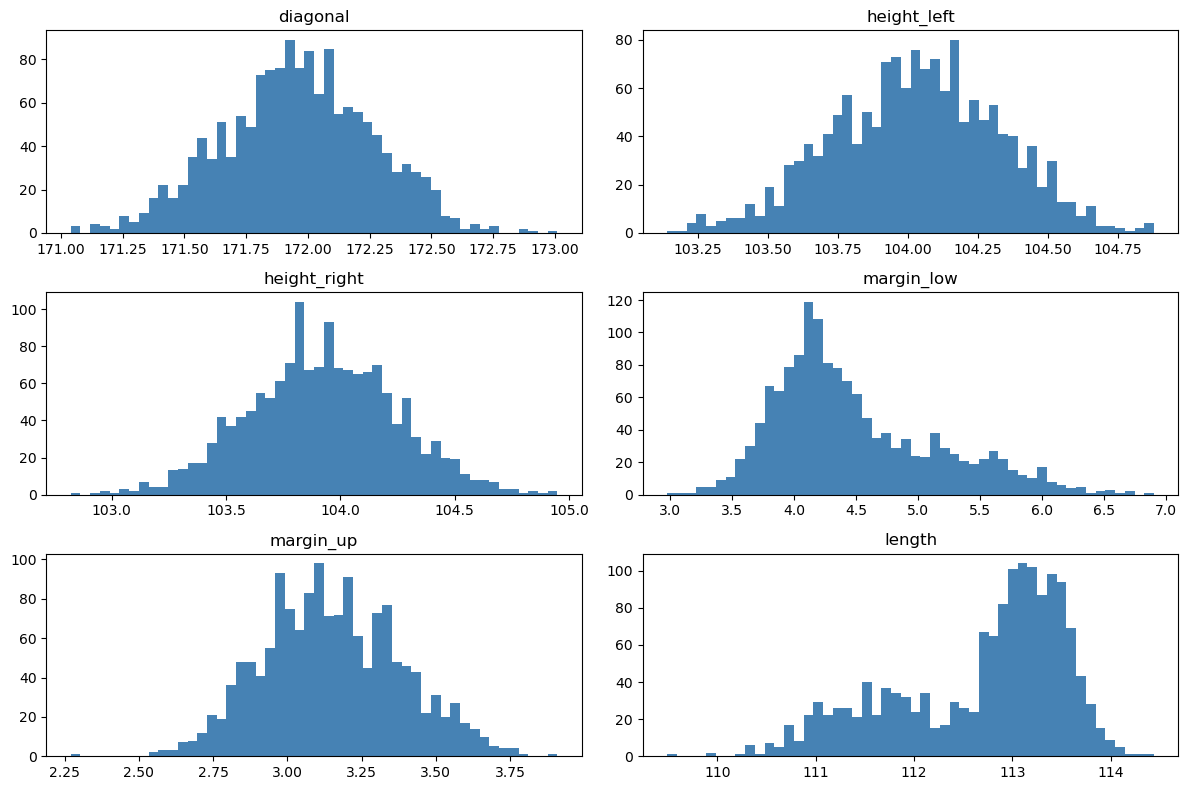

In [400]:
#Analyser la distribution des variables numériques

fig, axs = plt.subplots(3,2, figsize=(12,8))
axs = axs.ravel()

for i, column in enumerate(billet.columns[1:]):
    axs[i].hist(billet[column], bins=50, color="steelblue")
    axs[i].set_title(column)


plt.tight_layout()    
plt.show()

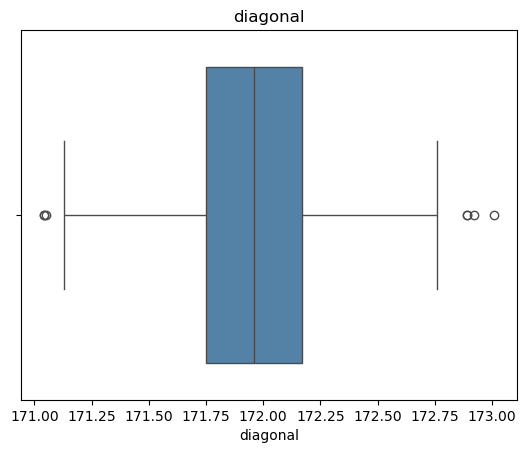

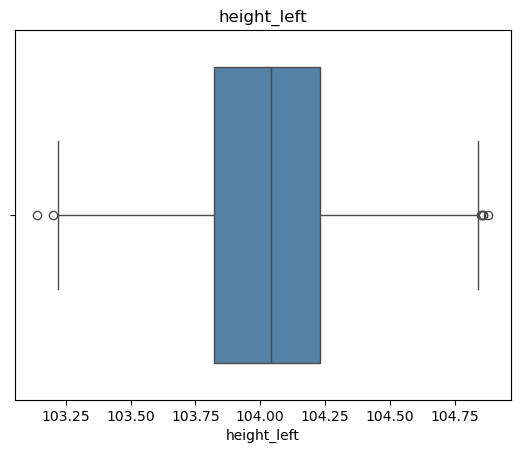

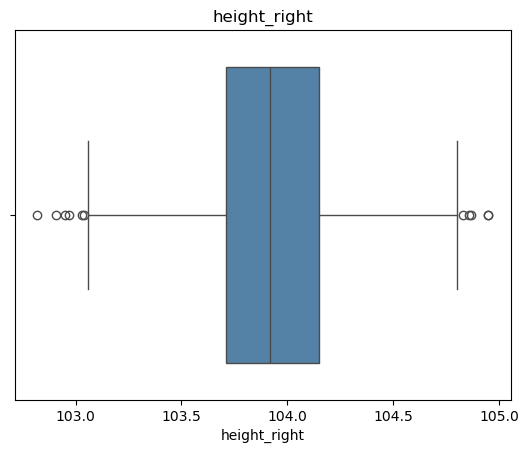

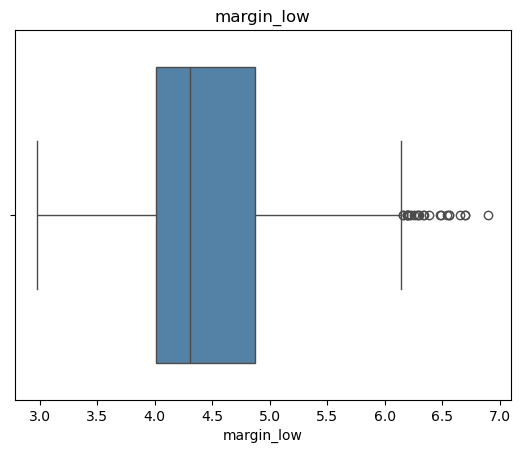

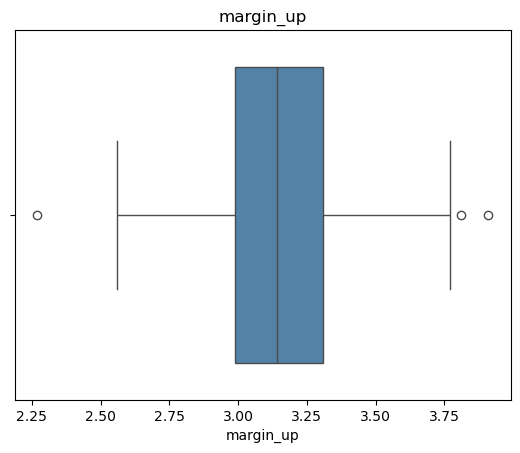

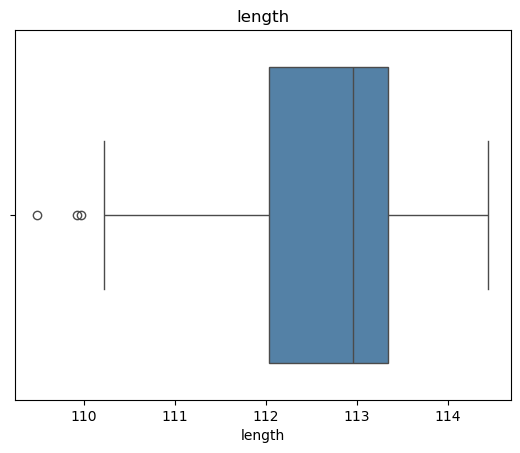

In [401]:
#Répartition des variables et visualisation des outliers via des boxplots

for col in billet.columns[1:]:
    sns.boxplot(x=billet[col], color="steelblue")
    plt.title(col)
    plt.show()

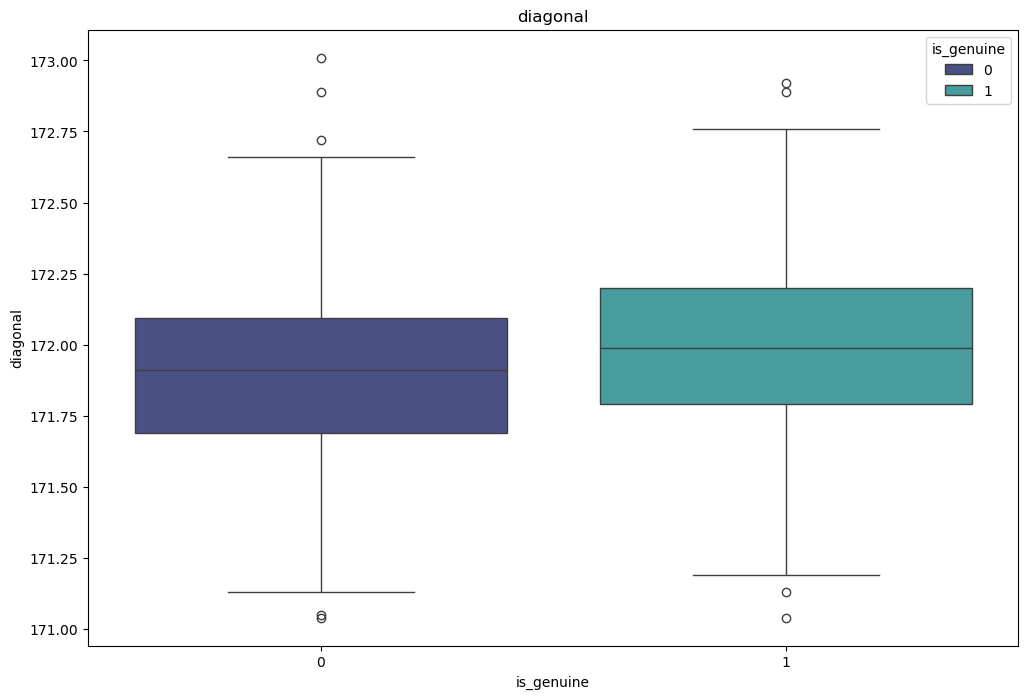

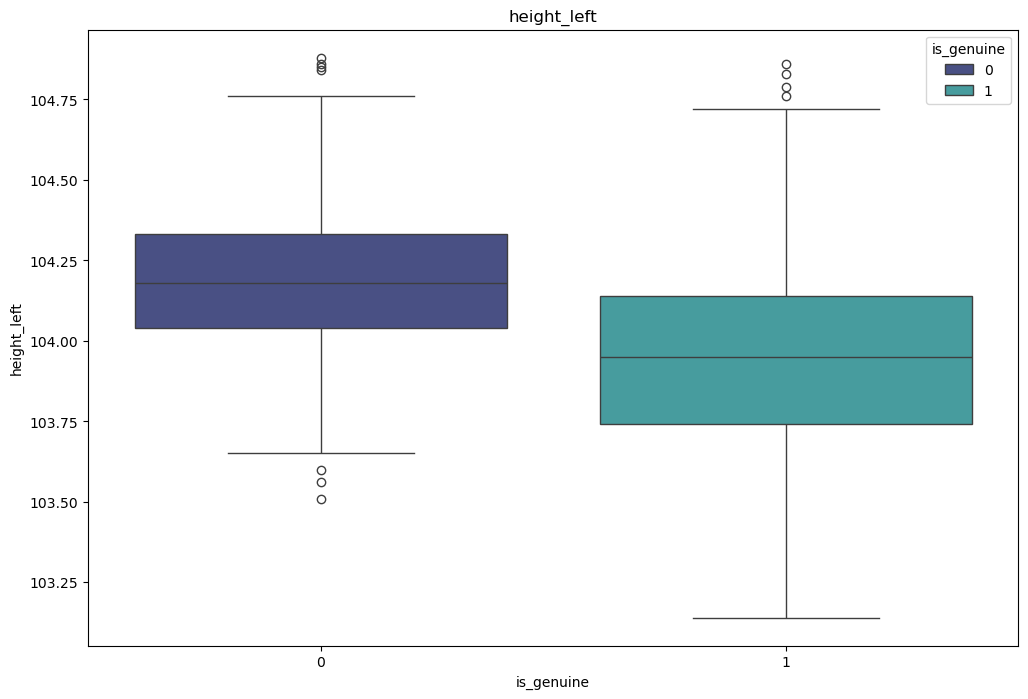

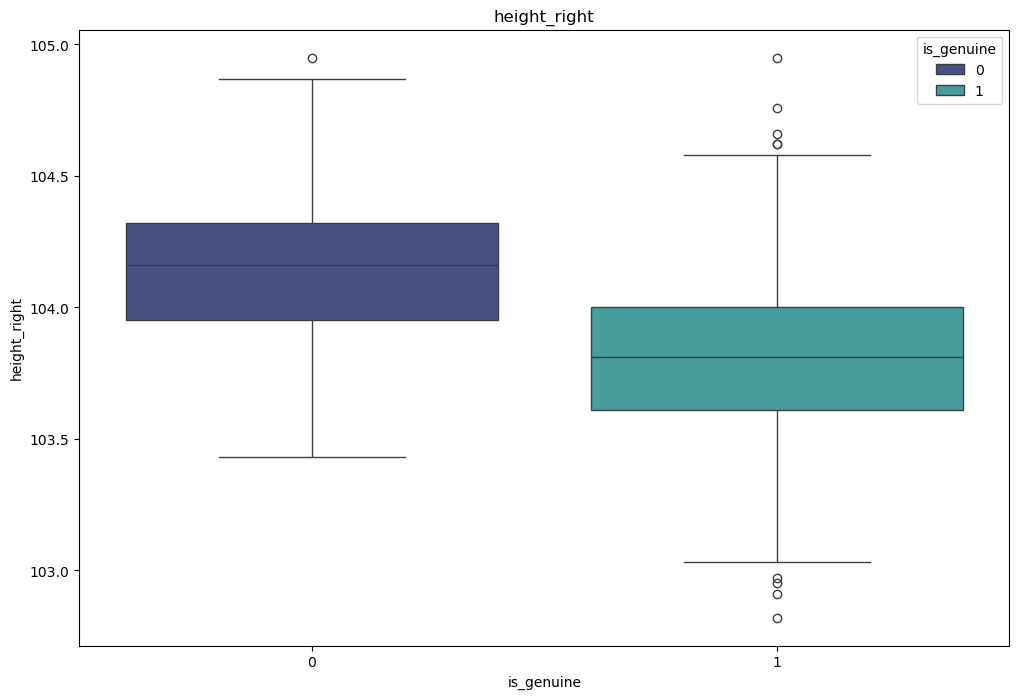

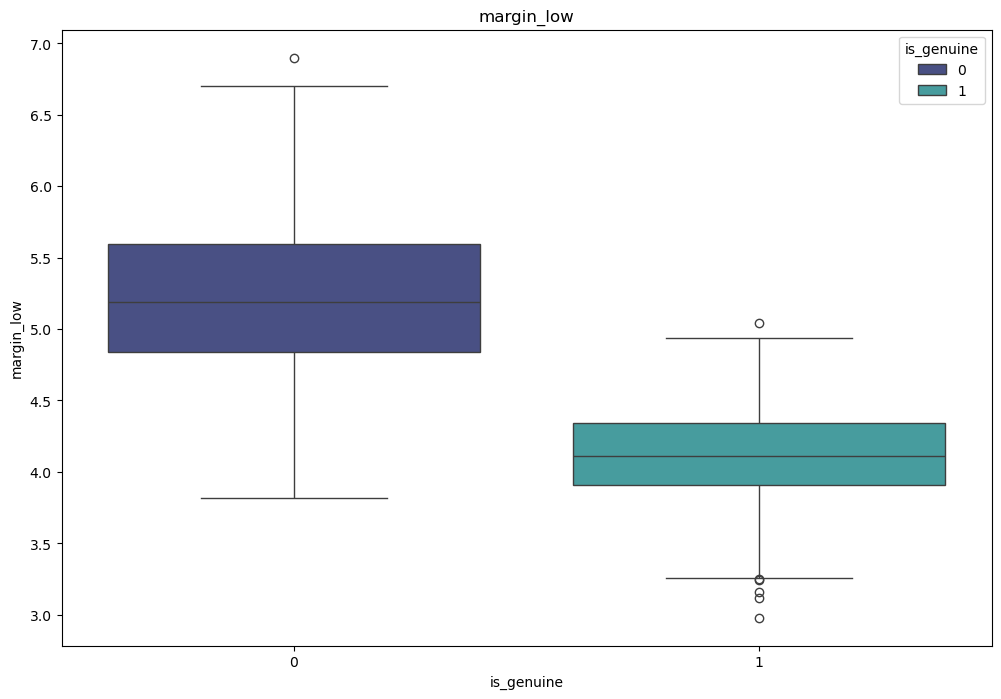

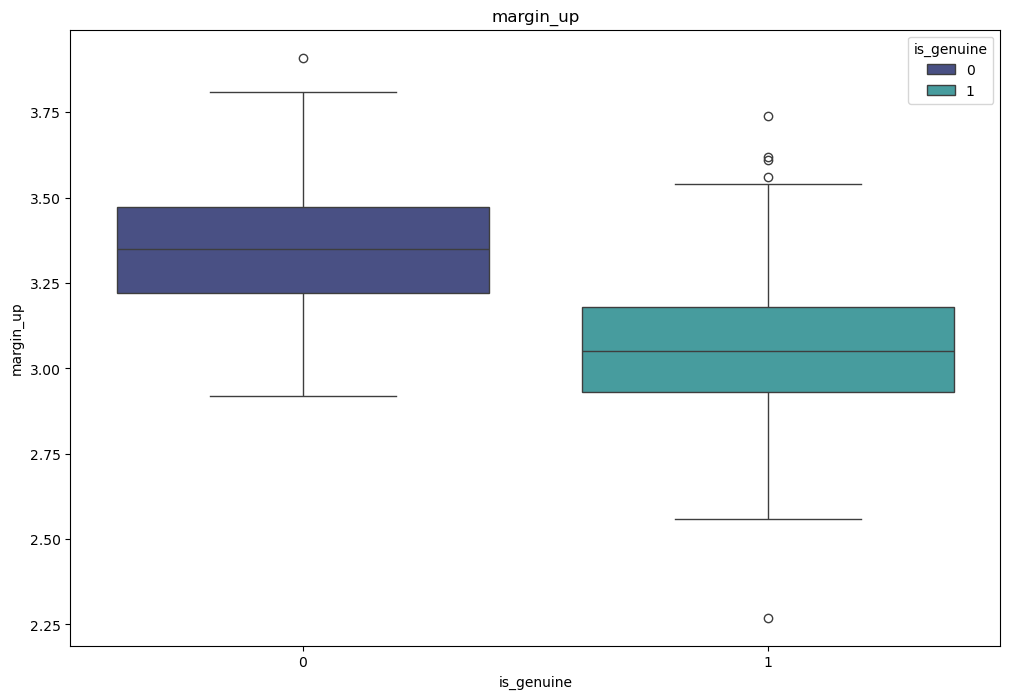

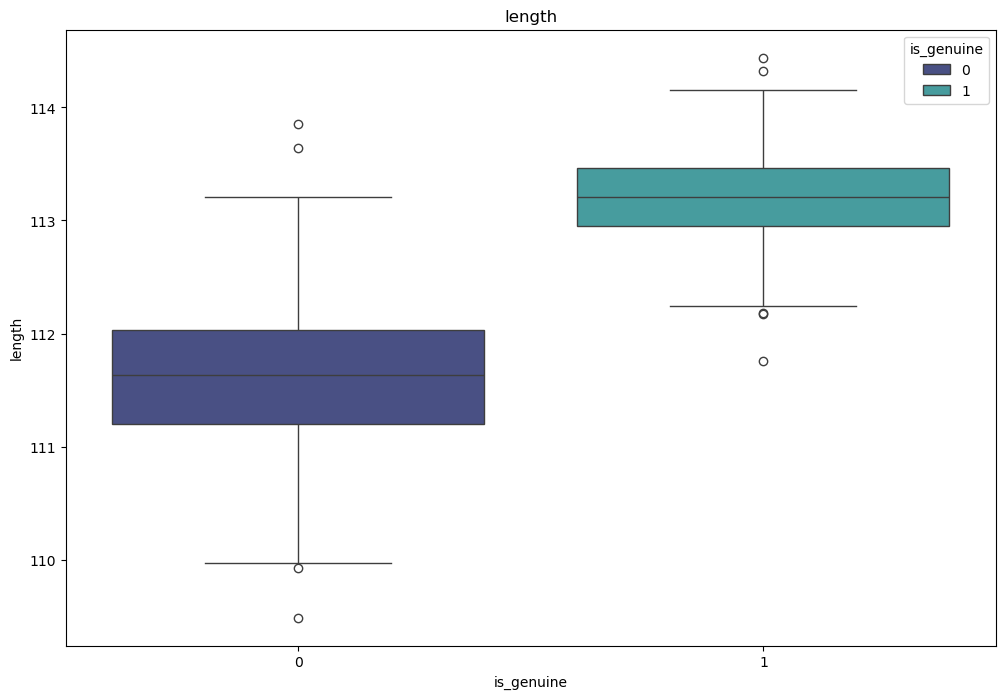

<Figure size 640x480 with 0 Axes>

In [402]:
### Répartition des variables pour les vrais / faux billets
for col in billet.columns[1:]:
    plt.figure(figsize=(12,8))
    sns.boxplot(x="is_genuine", y=col, data=billet, hue="is_genuine", palette="mako")
    plt.title(col)
    plt.show()
    
plt.tight_layout()

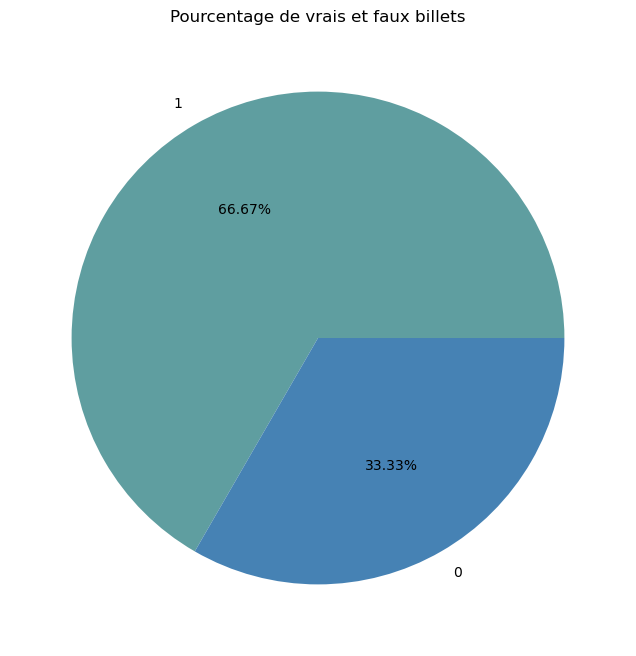

In [403]:
# Analyser le pourcentage de vrais et faux billets
plt.figure(figsize=(12,8))
billet["is_genuine"].value_counts().plot(kind="pie", autopct="%0.2f%%", colors=["cadetblue", "steelblue"])
plt.ylabel("")
plt.title("Pourcentage de vrais et faux billets")
plt.show()

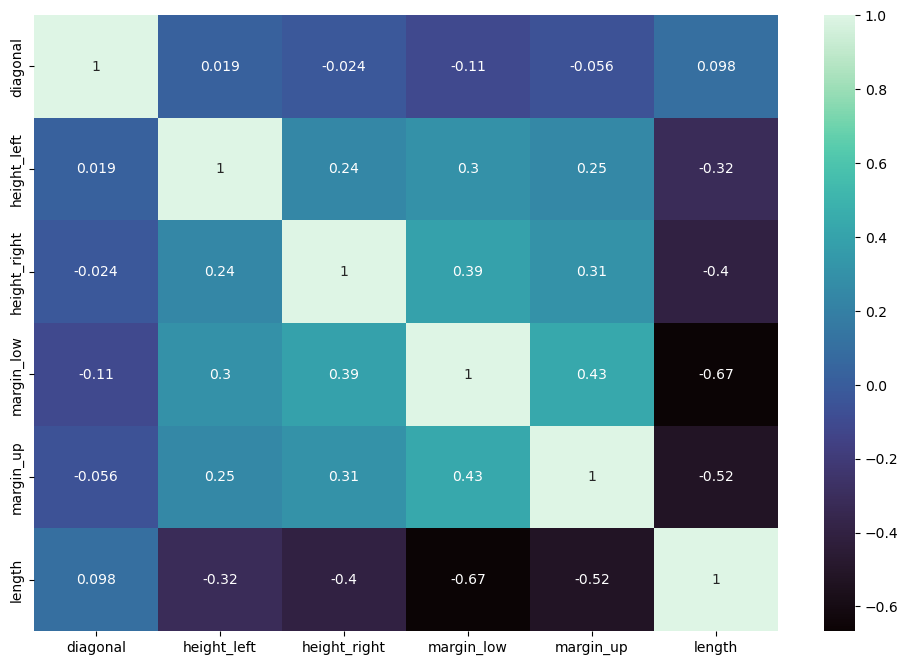

In [404]:
#analyse des corréations entre les variables numériques

#Suppression de la variable binaire 
billet_corr = billet.drop("is_genuine", axis=1)
#Etablir les corrélations entre les variables
billet_corr = billet_corr.corr()

#Visualisation des corrélations
plt.figure(figsize=(12,8))
sns.heatmap(billet_corr, annot=True, cmap="mako")
plt.show()

Corrélations :
"is_genuine" fortement correlée avec "length" (0.85), "margin_up" (-0.61) et "margin_low" (-0.78)
"margin_low" correlée avec "length" (-0.67) et "is_genuine" (-0.78)
"margin_up" corrrelée avec "length" (-0.52) et "is_genuine" (-0.61)
"length" correlée avec "margin_up" (-0.52), "margin_low" (-0.67) et "is_genuine" (0.85)

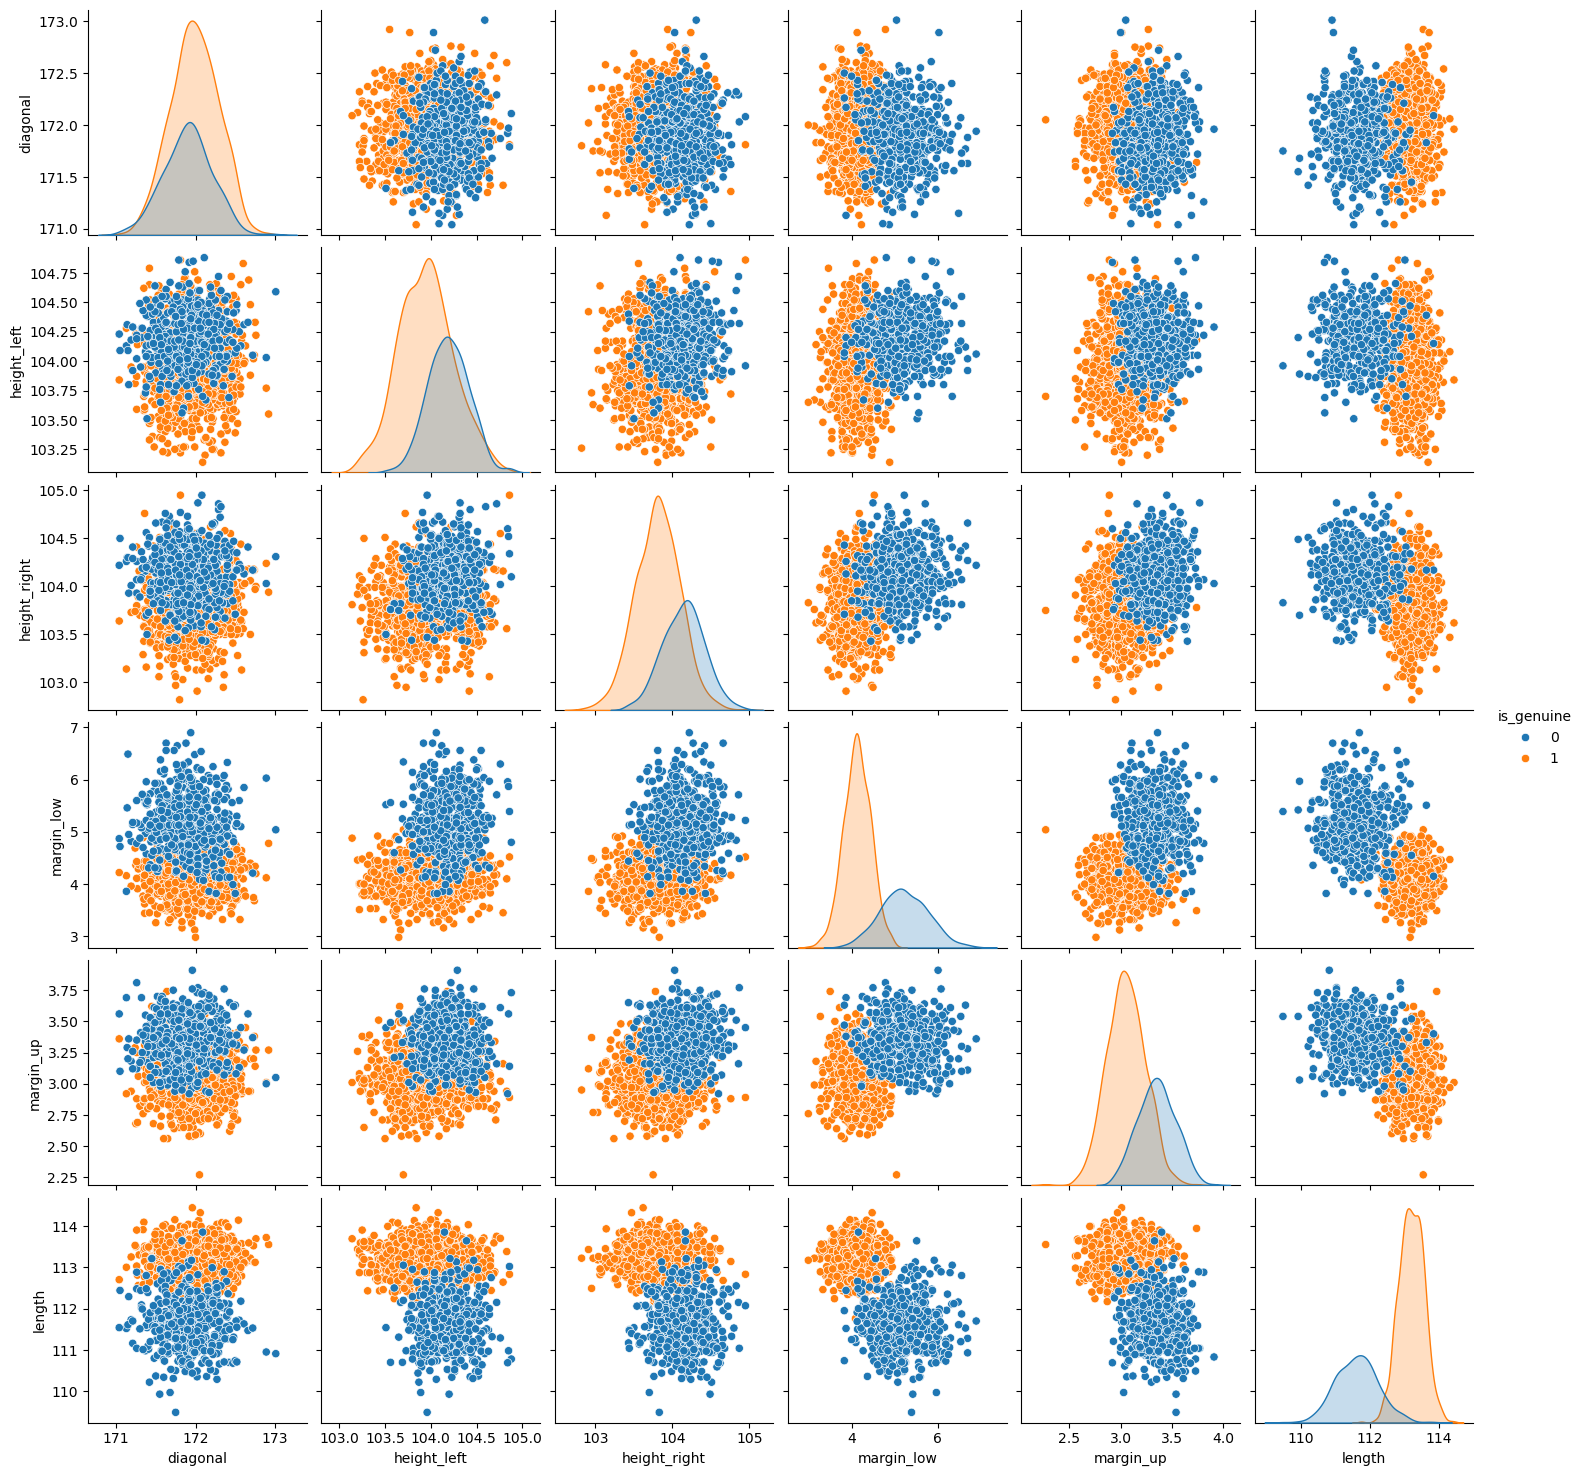

In [406]:
#Visualisation des corrélations entre les variables

sns.pairplot(billet, hue="is_genuine")
plt.show()

<div style="background-color: RGB(32, 178, 170);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3  - Régression linéaire</h2>
</div>

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">3.1 - Analyser les corrélations</h3>
</div>

Appliquation de la régression linéaire afin de prédire les valeurs manquantes dans la colonne 'margin_low'

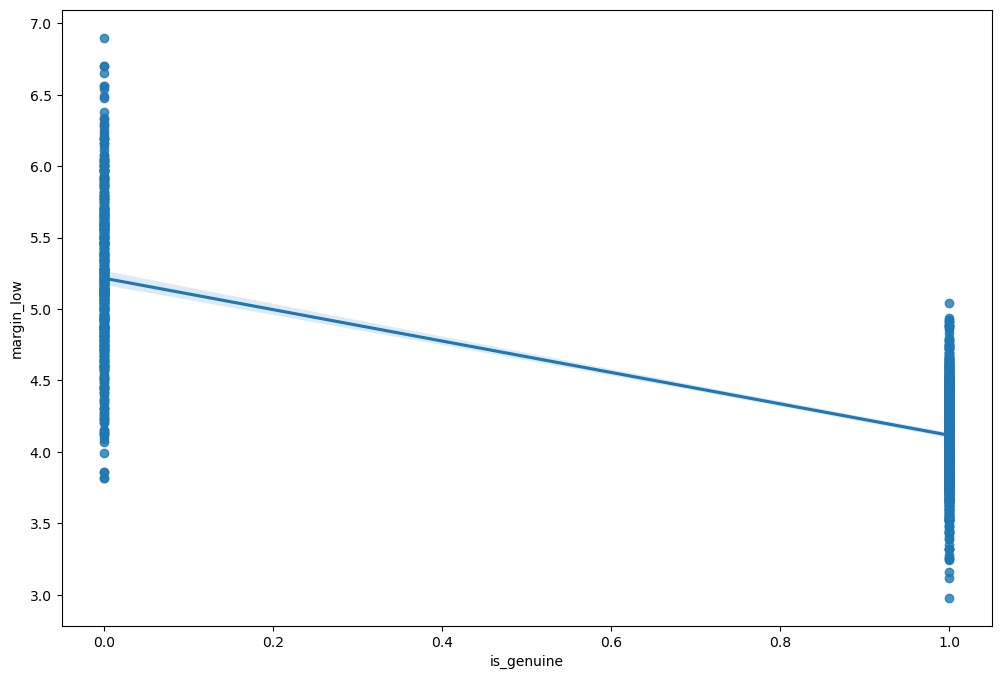

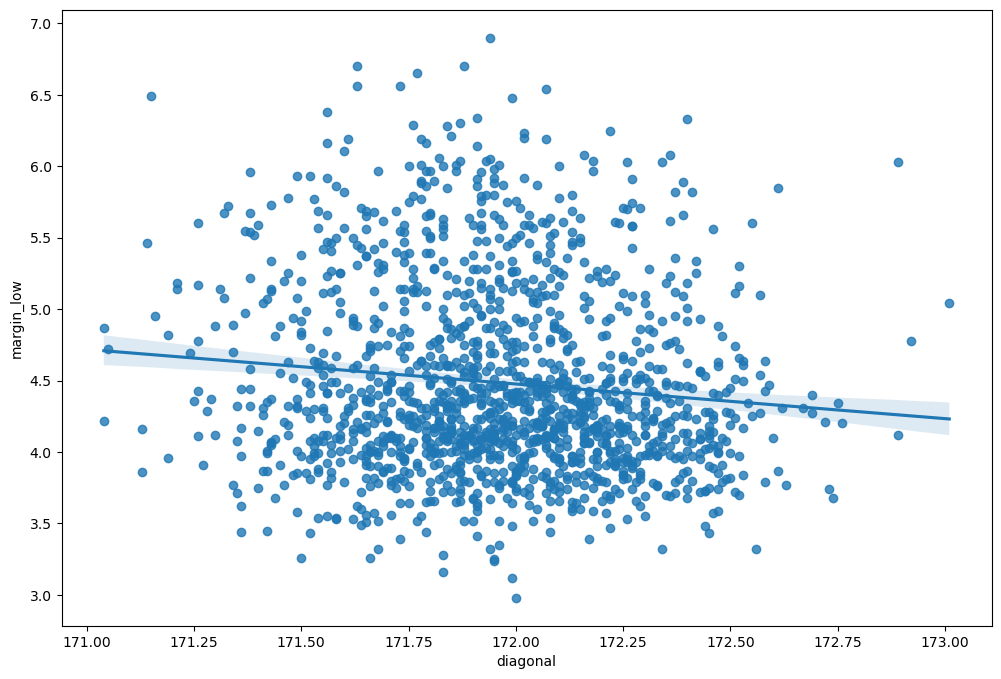

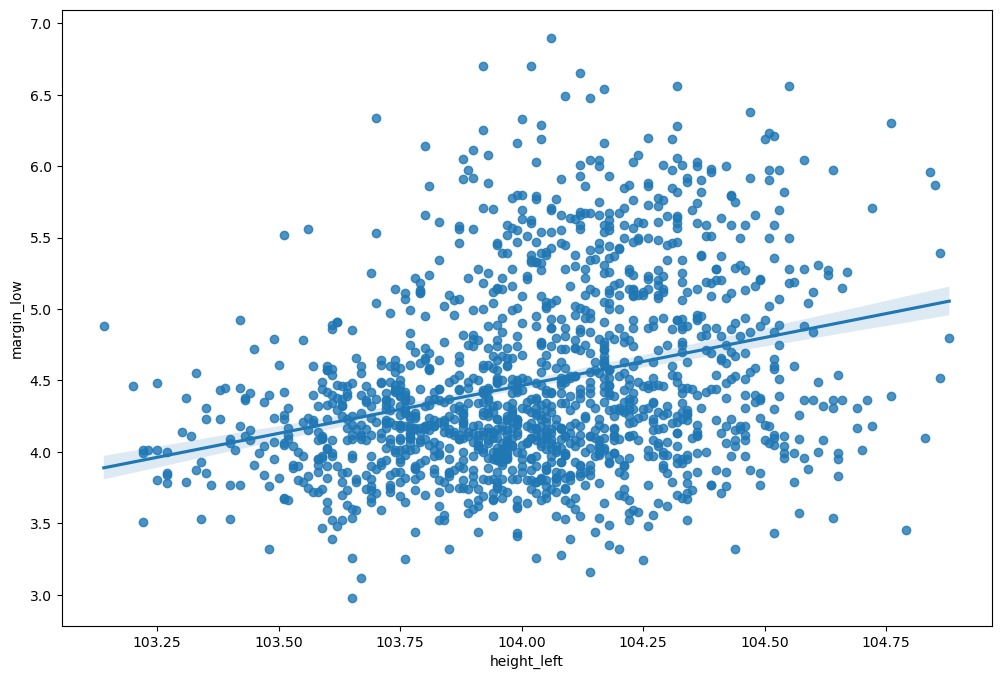

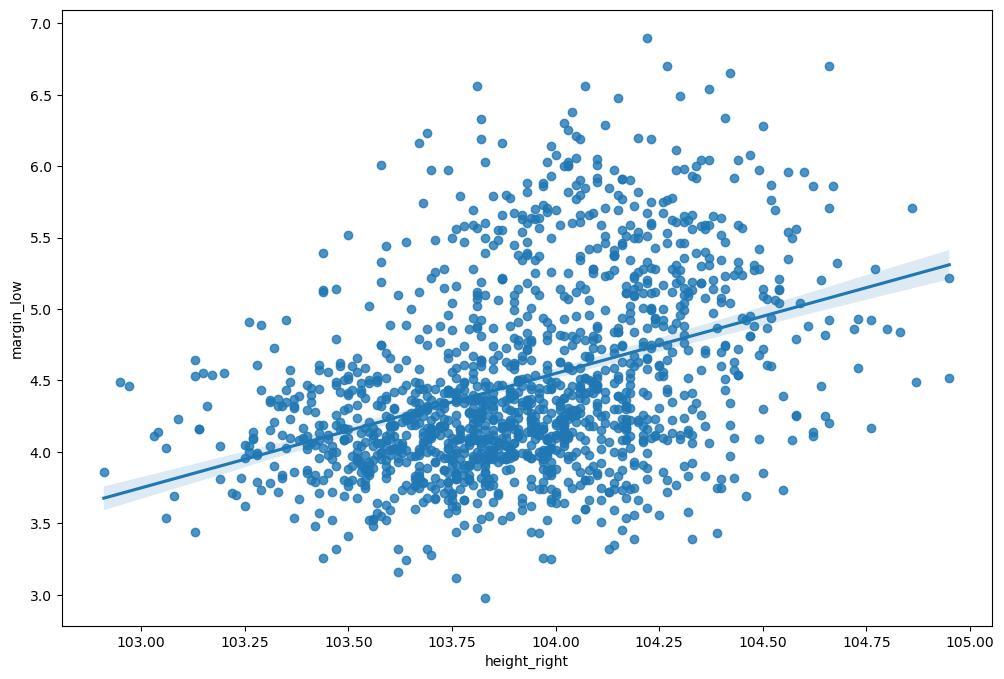

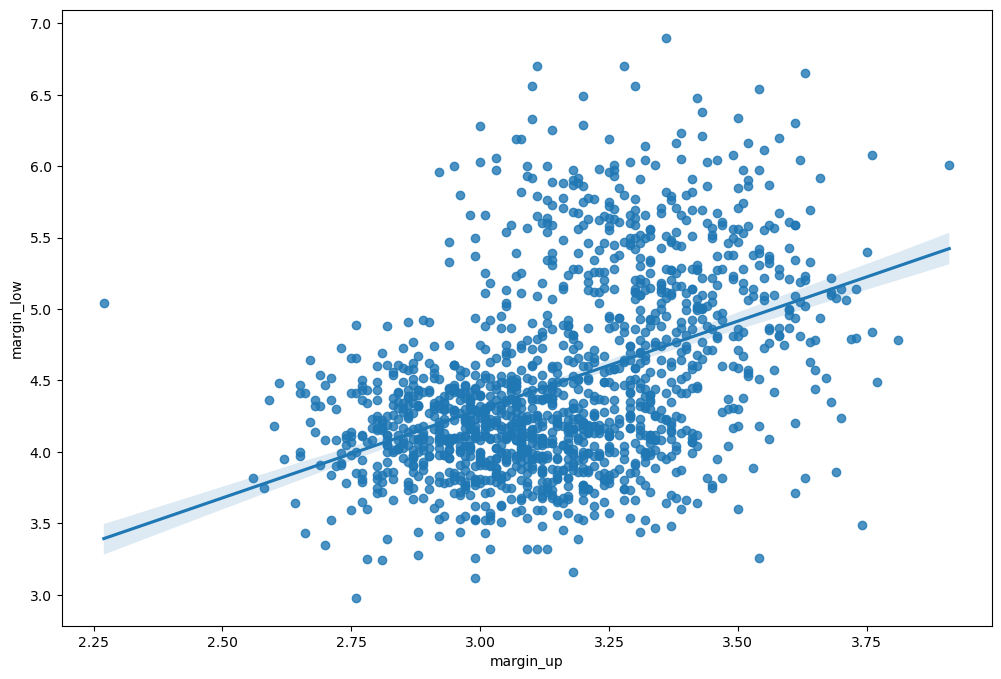

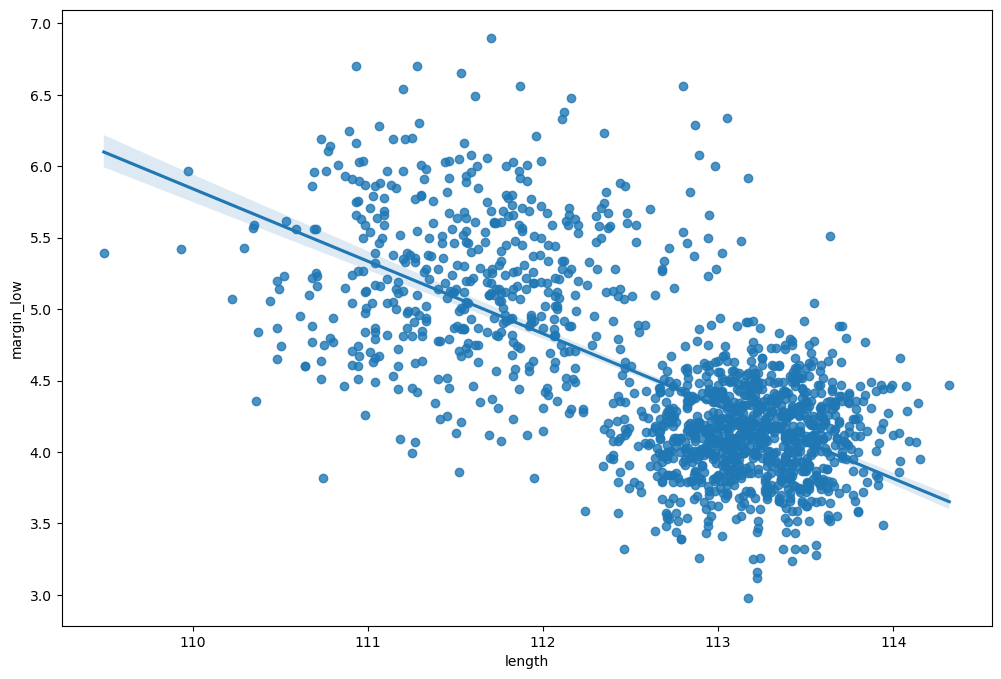

In [410]:
#Visualiser les corrélations entre les variables et la variable cible
X_var = billet.drop("margin_low", axis=1)

for col in X_var.columns:
    plt.figure(figsize=(12,8))
    sns.regplot(x=X_var[col], y=billet["margin_low"])
    plt.show()

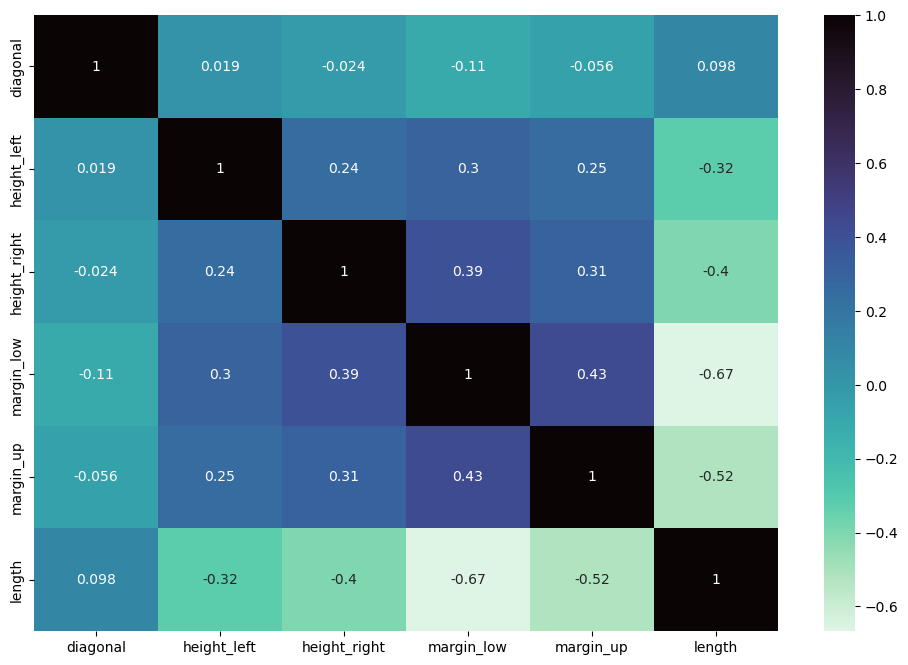

In [411]:
#Création de la matrice de corrélation pour les variables numériques
billet_rl = billet.drop("is_genuine",axis=1)
billet_rl_corr = billet_rl.corr()
#Visualisation de la matrice de corrélation
plt.figure(figsize=(12,8))
sns.heatmap(billet_rl_corr, annot=True, cmap="mako_r")
plt.show()

Corrélation avec la variable cible "margin_low" :\
une forte corrélation entre length / margin_low : -0.67\
une faible corrélation entre diagonal / margin_low : -0.11


<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">3.2 - Création du modèle avec statsmodels  </h3>
</div>

In [414]:
#Création d'un dataframe sans les valeurs manquantes
billet_novm = billet.dropna()

In [415]:
#Sélection automatique du modèle avec la fonction 'backward_selected', 
#Conserve uniquement les variables significatives (p_value<0.05)

columns = ["is_genuine","diagonal","height_left","height_right","margin_low","margin_up","length"]
backward_select = backward_selected(billet_novm[columns],"margin_low")

_______________________________
margin_low ~ diagonal + height_left + height_right + is_genuine + length + margin_up + 1
remove length (p-value : 0.868 )

_______________________________
margin_low ~ diagonal + height_left + height_right + is_genuine + margin_up + 1
remove diagonal (p-value : 0.719 )

_______________________________
margin_low ~ height_left + height_right + is_genuine + margin_up + 1
remove height_right (p-value : 0.496 )

_______________________________
margin_low ~ height_left + is_genuine + margin_up + 1
remove height_left (p-value : 0.454 )

_______________________________
margin_low ~ is_genuine + margin_up + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                

Notre modèle final comprend deux variables significatives : margin_up et is_genuine

In [417]:
# Séparation des variables sur la base Train/Test
train, test = train_test_split(billet_novm, test_size=0.20, random_state=42)


In [418]:
# Normaliser les  les données 

#Instanciation
scaler= MinMaxScaler()

#Normalisation des données (variables prédictrices base Train/Test)
train[["is_genuine","margin_up"]] = scaler.fit_transform(train[["is_genuine","margin_up"]])
test[["is_genuine","margin_up"]]= scaler.transform(test[["is_genuine","margin_up"]])



In [419]:
#Visualisation des dimensions de la base Train / Test
train.shape,test.shape

((1170, 7), (293, 7))

In [420]:
#Entraîner le modèle
reg_lin = smf.ols("margin_low ~ is_genuine+margin_up", data=train).fit()

print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     886.1
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          8.27e-235
Time:                        13:47:51   Log-Likelihood:                -646.19
No. Observations:                1170   AIC:                             1298.
Df Residuals:                    1167   BIC:                             1314.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4268      0.076     71.282      0.0

In [421]:
#Séparation des variables prédictrices et la variable cible sur la base Train/ Test
X_train = train[["is_genuine","margin_up"]]
y_train = train["margin_low"]

X_test = test[["is_genuine","margin_up"]]
y_test = test["margin_low"]

In [422]:
#Prédiction sur les bases Train / test
y_train_pred = reg_lin.predict(X_train)
y_test_pred = reg_lin.predict(X_test)

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">3.2 - Analyser les hypthèses du modèle</h3>
</div>

In [424]:
# Vérification de la colinéarité des variables

variables = reg_lin.model.exog
vif = pd.DataFrame(
{"Vif_value" : [variance_inflation_factor(variables, i) for i in np.arange(1, variables.shape[1])],
 "Variables" : X_train.columns})

vif

,Vif_value,Variables
0,1.640983,is_genuine
1,1.640983,margin_up


Tous les coefficients sont inférieurs à 10, il n'y a donc pas de forte corrélation linéaire entre les variables

In [426]:
#Vérification de l'homoscédasticité des résidus (constance de la variance)

#H0 :  p-valeur > 5% homoscédasticité des résidus
#H1 : p-valuer < 5% hétéroscédasticité des rédisus

#Stocker les résidus dans une variable
residus = reg_lin.resid

#Test de Breusch pagan pour tester l'homoscédasticité
test_bp = sm.stats.diagnostic.het_breuschpagan(residus, variables)
print("Test de Breusch Pagan : p_value= %f"% (test_bp[1]))

Test de Breusch Pagan : p_value= 0.000000


la p-valeur est inférieur à 5%, on rejette l'hypothèse H0, les résidus ne sont pas constants

<Figure size 1200x800 with 0 Axes>

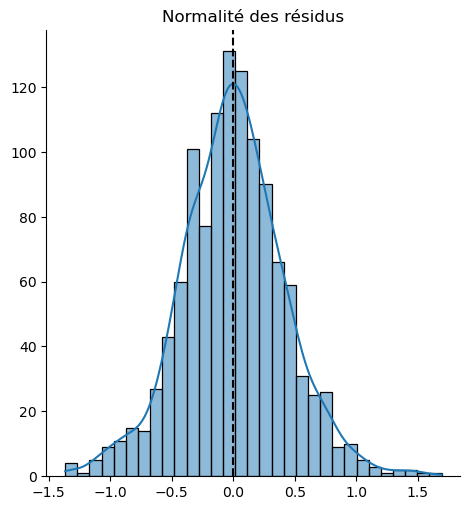

In [428]:
#Visualisation de la normalité des résidus

plt.figure(figsize=(12,8))
sns.displot(residus, kde=True)
plt.axvline(x=0, ls="--", color="black")
plt.title("Normalité des résidus")
plt.ylabel("")
plt.show()

<Figure size 1200x800 with 0 Axes>

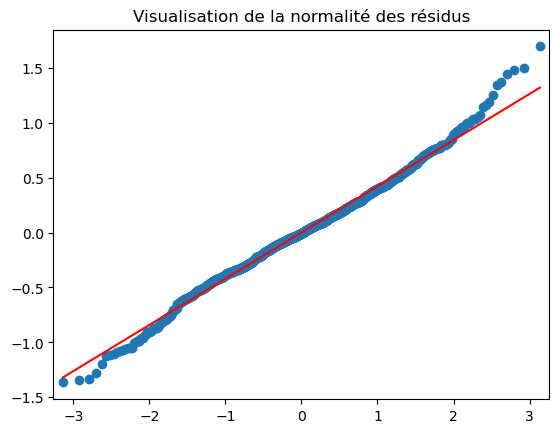

In [429]:
# Visualisation des résidus via un QQ-plot
plt.figure(figsize=(12,8))
sm.qqplot(residus, line='s', color="black")
plt.title("Visualisation de la normalité des résidus")
plt.ylabel("")
plt.xlabel("")
plt.show()

Les résidus ne semblent pas suivrent un loi normale car ne sont pas parfaitement alignés sur la droite


In [431]:
#Vérification de la normalité des résidus via des tests statistiques 

test_shapiro = stats.shapiro(residus)
print("Test de shapiro_wilk :",test_shapiro.pvalue )


test_kolmo_smirnov= stats.kstest(residus, "norm")
print("Test de Kolmogorov-smirnov :",test_kolmo_smirnov.pvalue )

Test de shapiro_wilk : 3.215659671695903e-05
Test de Kolmogorov-smirnov : 6.026052052790693e-47


In [432]:
#Skewness des résidus
residus.skew()

0.09737599604105458

Selon les tests statistiques les résidus ne pas sont normalement distribués\
Mais nous avons un skew (0.097) très proche de 0 et visuellement on peut voir que les résidus sont proche de la normalité

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">3.3 -   Evaluation du modèle et prédiction des valeurs </h3>
</div>

In [435]:
# Obtention des prédictions et des métriques d'évaluation

#Métriques d'évaluation du modèle 
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred)) 
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred)) 

mape_train =mean_absolute_percentage_error(y_train,y_train_pred)
mape_test = mean_absolute_percentage_error(y_test,y_test_pred)


In [436]:
#Afficher les résultats dans un tableau

metriques = pd.DataFrame({
            "Métriques" : ["R2","MSE","RMSE","MAPE"],
            "Train" : [r2_train,mse_train,rmse_train,mape_train],
            "Test" : [r2_test,mse_test,rmse_test,mape_test]
})


metriques

,Métriques,Train,Test
0,R2,0.602964,0.673621
1,MSE,0.176704,0.137570
2,RMSE,0.420362,0.370905
3,MAPE,0.071528,0.065041


<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">3.4 -  Remplacement des valeurs manquantes </h3>
</div>

In [438]:
# Application de notre modèle à notre dataframe initiale


#Séparation des variables prédictrices et la variable cible
X_billet = billet[["is_genuine","margin_up"]]
y_billet = billet["margin_low"]

In [439]:
#Prédire les valeurs de la variable cible avec notre modèle précédemment créé

y_pred_billet = reg_lin.predict(X_billet)

In [440]:
#stocker dans une variables les lignes contenant des valeurs nulles
null = billet[billet["margin_low"].isna()].copy()


In [441]:
#Créer un nouveau dataframe pour stocker nos valeurs finales
billet_clean = billet.copy()

#Remplacement des valeurs manquantes dans notre dataframe initiale
billet_clean["margin_low"] = billet_clean["margin_low"].fillna(y_pred_billet)

In [442]:
#Visualisation des lignes dont les valeurs ont été remplacées

billet_clean.loc[null.index]


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,3.197702,3.25,112.79
99,1,171.93,104.07,104.18,3.234072,3.14,113.08
151,1,172.07,103.80,104.38,3.273748,3.02,112.93
197,1,171.45,103.66,103.80,3.075366,3.62,113.27
241,1,171.83,104.14,104.06,3.273748,3.02,112.36
251,1,171.80,103.26,102.82,3.296893,2.95,113.22
284,1,171.92,103.83,103.76,3.204314,3.23,113.29
334,1,171.85,103.70,103.96,3.280361,3.00,113.36
410,1,172.56,103.72,103.51,3.240684,3.12,112.95
413,1,172.30,103.66,103.50,3.227459,3.16,112.95


In [443]:
billet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [444]:
#Analyse statistique de l'ensemble des variables du dataframe finale
billet_clean.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.461670,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.676848,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.000000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.300000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.860000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


<div style="background-color: RGB(32, 178, 170);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4  - Régression logistique</h2>
</div>

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">4.1 - Création du modèle de régression logistique</h3>
</div>

In [447]:
#Sélection de notre modèle via la sélection 'backward'

columns = ["is_genuine","diagonal","height_left","height_right","margin_low","margin_up","length"]
backward_model = backward_selected_logistic(billet_clean[columns],"is_genuine")

_______________________________
is_genuine ~ diagonal + height_left + height_right + length + margin_up + margin_low + 1
Optimization terminated successfully.
         Current function value: 0.026440
         Iterations 13
remove diagonal (p-value : 0.579 )

_______________________________
is_genuine ~ height_left + height_right + length + margin_up + margin_low + 1
Optimization terminated successfully.
         Current function value: 0.026543
         Iterations 13
remove height_left (p-value : 0.242 )

_______________________________
is_genuine ~ height_right + length + margin_up + margin_low + 1
Optimization terminated successfully.
         Current function value: 0.027007
         Iterations 13
is the final model !

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1495
Method:                       

Les variables significatives sont : Length, margin_low, height_right, margin_up

In [449]:
#Création d'un dataframe pour l'algorithme de régression logistique
billet_rl = billet_clean.copy()

In [450]:
#Séparation des variables predictrices et variable cible
X = billet_rl.drop(["is_genuine","diagonal","height_left"], axis=1)
y = billet_rl["is_genuine"]

In [451]:
#Séparation des données sur la base Train, Test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

#Standardiser les données
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [452]:
#Visualisation des dimensions des bases
X_train.shape, X_test.shape

((1200, 4), (300, 4))

In [453]:
#Entraînement du modèle
reg_log = LogisticRegression()

rl_model = reg_log.fit(X_train, y_train)

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">4.2 -  Analyser les performances du modèle</h3>
</div>

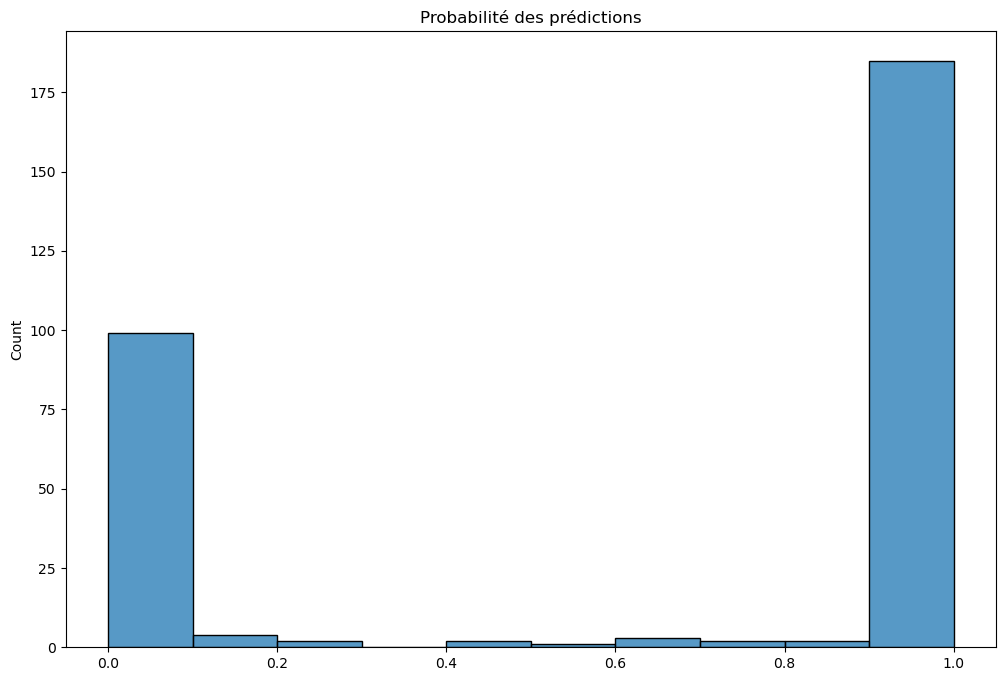

In [455]:
#Visualiser les probabilités des prédictions sur la base Test
y_hat_proba = rl_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(12,8))
sns.histplot(y_hat_proba)
plt.title("Probabilité des prédictions")
plt.show()

Modèle assez performant la majorité des prédictions ont une probabilité proche de 0 ou de 1

In [457]:
#Obtenir les prédictions 
y_train_pred = rl_model.predict(X_train)
y_test_pred = rl_model.predict(X_test)

In [458]:
#Evaluer l'éxactitude du modèle via le score 'accuracy_score'
from sklearn.metrics import f1_score
rl_train_accuracy = round(accuracy_score(y_train,y_train_pred)*100,3)
rl_test_accuracy = round(accuracy_score(y_test,y_test_pred)*100,3)


print("L'exactitude de la base train est de :",rl_train_accuracy)
print("L'exactitude de la base test est de :",rl_test_accuracy,"%\n")


L'exactitude de la base train est de : 99.083
L'exactitude de la base test est de : 99.0 %



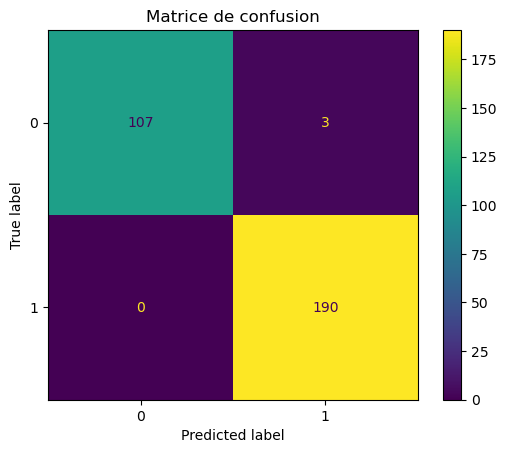

In [459]:
#Matrice de confusion pour évaluer le classement du modèle sur la base test

conf_matrix = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = rl_model.classes_)

display.plot()
plt.title("Matrice de confusion")
plt.show()

In [460]:
#Evaluer les différentes métriques pour chacune des classes sur la base Test

print(classification_report(y_test, y_test_pred, digits=3))


              precision    recall  f1-score   support

           0      1.000     0.973     0.986       110
           1      0.984     1.000     0.992       190

    accuracy                          0.990       300
   macro avg      0.992     0.986     0.989       300
weighted avg      0.990     0.990     0.990       300



In [461]:
#Stocker les scores de performance dans un dataframe
rl_precision_score = round(precision_score(y_test, y_test_pred)*100,3)
rl_recall_score = round(recall_score(y_test, y_test_pred)*100,3)
rl_f1_score = round(f1_score(y_test, y_test_pred)*100,3)



rl_metrics = pd.DataFrame(
    {
    "Accuracy_score" :[rl_test_accuracy],
    "Precision_score" :[rl_precision_score],
    "Recall_score" :[rl_recall_score],
    "f1_score" : [rl_f1_score],
    },
    index=["Régression logistique"]
)
    
rl_metrics 

,Accuracy_score,Precision_score,Recall_score,f1_score
Régression logistique,99.0,98.446,100.0,99.217


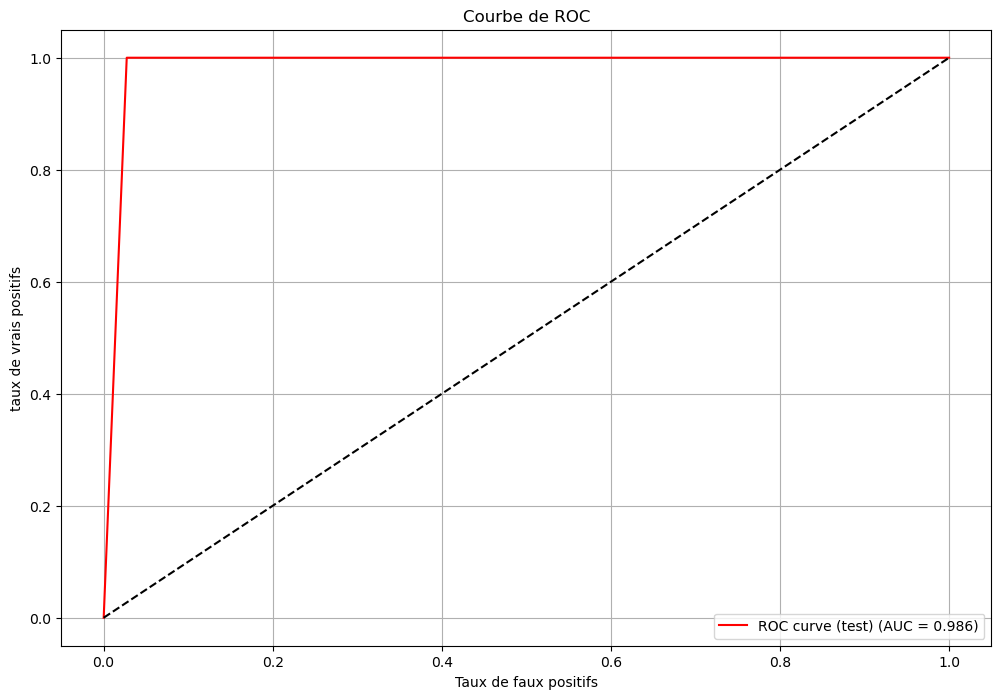

In [462]:
#Courbe de ROC

#Calcul des courbes ROC et AUC pour la base Test
rl_fpr, rl_tpr, rl_threshold = roc_curve(y_test, y_test_pred)
roc_auc_rl = auc(rl_fpr, rl_tpr)

#Visualisation des courbes 
plt.figure(figsize=(12,8))
plt.plot(rl_fpr, rl_tpr, color="r",label="ROC curve (test) (AUC = %0.3f)" % roc_auc_rl)
plt.plot([0,1], [0,1], color='black', linestyle="--")
plt.title("Courbe de ROC")
plt.xlabel("Taux de faux positifs")
plt.ylabel("taux de vrais positifs")
plt.legend()
plt.grid()
plt.show()


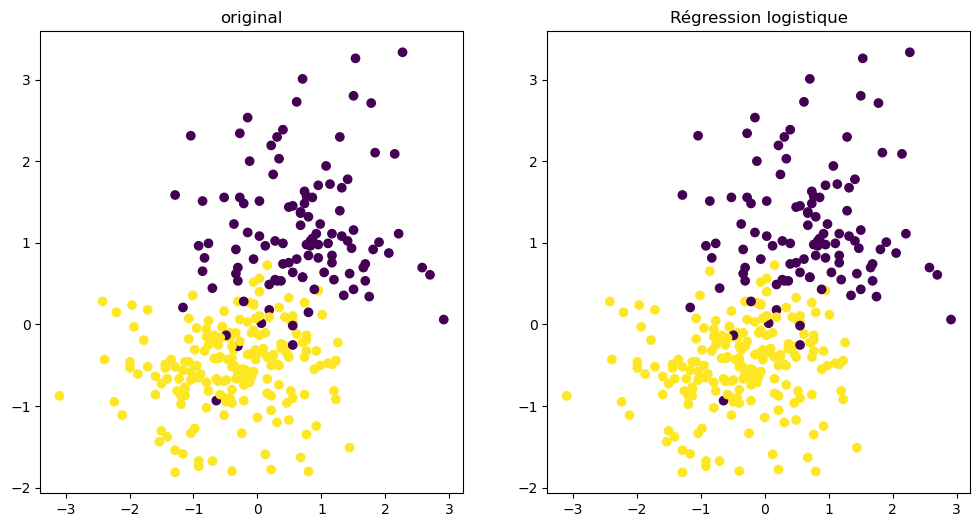

In [463]:
#Visualisation des valeurs initiales et des valeurs prédites

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.scatter(X_test[:,0],X_test[:,1], c=y_test)
ax.set_title("original")

ax = fig.add_subplot(1,2,2)
ax.scatter(X_test[:,0], X_test[:,1], c=y_test_pred)
ax.set_title("Régression logistique")

plt.show()


Les valeurs prédites sont très simialires aux valeurs initiales, quelques points sont différents

<div style="background-color: RGB(32, 178, 170);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5  - Kmeans</h2>
</div>

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">5.1 - Appliquation du kmeans</h3>
</div>

In [467]:
# Création d'un data frame pour le k_means
billet_kmeans = billet_clean.copy()

In [468]:
# Sépartiotn des variables prédictrices et variable cible
X = billet_kmeans.drop("is_genuine", axis=1)
y = billet_kmeans["is_genuine"]

In [469]:
#Séparation de nos données sur la base Train / Test
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardisation des données
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [470]:
#Visualisation des dimensions des bases
X_train.shape, X_test.shape

((1200, 6), (300, 6))

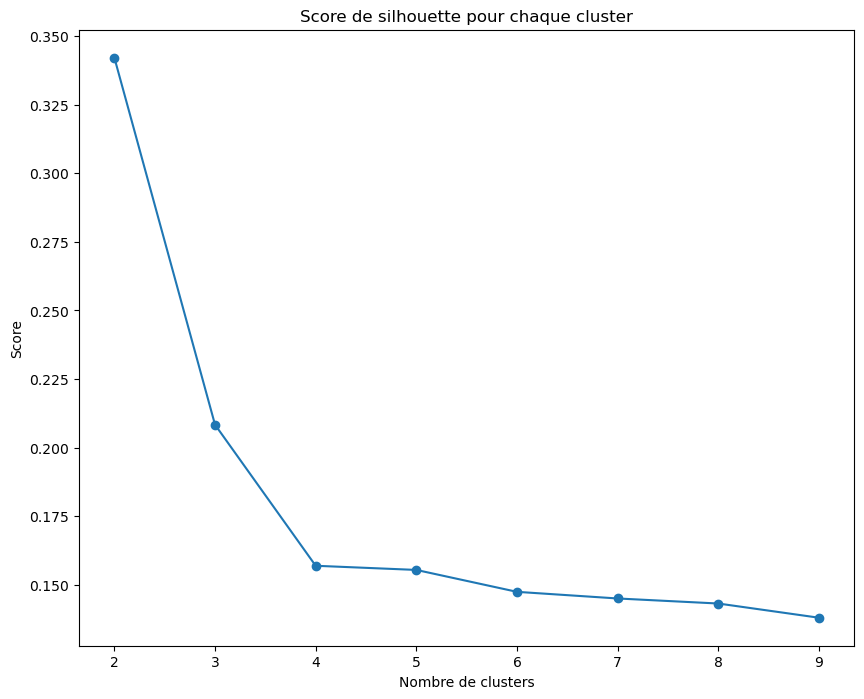

In [471]:
#Visualiser le nombre optimal de cluster via le score de silhouette

#Calcul du score de silhouette pour chaque cluster 
silhouette_scores = []
k_clust = range(2,10)
for clusters in k_clust:
    kmeans = KMeans(n_clusters=clusters, n_init="auto")
    kmeans.fit(X_train)
    kmeans_labels = kmeans.predict(X_train)
    silhouette_scores.append(silhouette_score(X_train,kmeans_labels))
    
#Visualisation des scores de silhouette pour chaque cluster
plt.figure(figsize=(10,8))
plt.plot(k_clust, silhouette_scores,marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score")
plt.title("Score de silhouette pour chaque cluster")
plt.show()

Le nombre optimal est 2 clusters 

In [473]:
# Appliquation du Kmeans 
kmeans_model = KMeans(n_clusters=2, n_init="auto")
kmeans_model.fit(X_train)

KMeans(n_clusters=2, n_init='auto')

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">5.2 -  Analyser les performances du modèle</h3>
</div>

In [475]:
#Prédicition des classes sur la base de test
labels_pred = kmeans_model.predict(X_test)


In [476]:
#Score de classification
print("score", kmeans_model.score(X_test))
print("Score de silhouette",silhouette_score(X_test, labels_pred))

score -1109.366275352563
Score de silhouette 0.3348612151241574


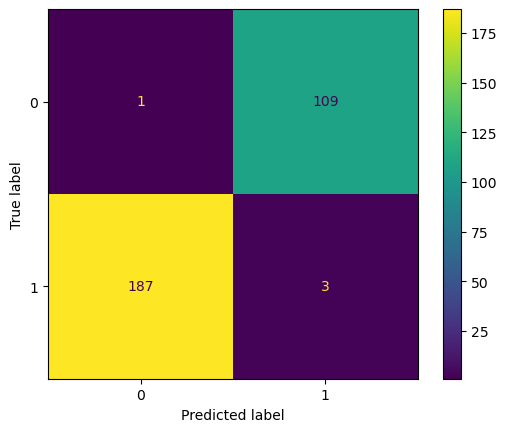

In [477]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, labels_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

display.plot()
plt.show()

In [478]:
#Vérification des classes prédites
km_accuracy = round(accuracy_score(y_test,labels_pred)*100,3)


if km_accuracy < 50:
    print("Les classes doivent être inversées :")
    # Inversement des classes prédites
    #Valeurs intérmédiaires
    labels_pred[labels_pred==0]=5
    labels_pred[labels_pred==1]=10

    #Association des bonnes classes
    labels_pred[labels_pred==5]=1
    labels_pred[labels_pred==10]=0

    #Accuracy score final
    km_accuracy = round(accuracy_score(y_test,labels_pred)*100,2)
    print("L'accuracy score est de : %0.2f" % km_accuracy,"%")
else:
    print("L'accuracy score est de : %0.2f" % km_accuracy,"%")




Les classes doivent être inversées :
L'accuracy score est de : 98.67 %


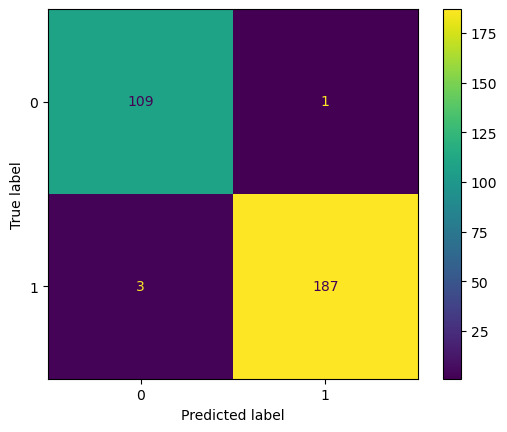

In [547]:
# Matrice de confusion avec les labels inversées
conf_matrix = confusion_matrix(y_test, labels_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

display.plot()
plt.show()

In [549]:
# Rapport de classification
print(classification_report(y_test, labels_pred, digits=3))


              precision    recall  f1-score   support

           0      0.973     0.991     0.982       110
           1      0.995     0.984     0.989       190

    accuracy                          0.987       300
   macro avg      0.984     0.988     0.986       300
weighted avg      0.987     0.987     0.987       300



In [551]:
#Enregistrement des scores de performance du kmeans

km_precision_score = round(precision_score(y_test, labels_pred)*100,3)
km_recall_score = round(recall_score(y_test, labels_pred)*100,3)
km_f1_score = round(f1_score(y_test, labels_pred)*100,3)


kmeans_metrics = pd.DataFrame(
    {
    "Accuracy_score" :[km_accuracy],
    "Precision_score" :[km_precision_score],
    "Recall_score" :[km_recall_score],
    "f1_score" : [km_f1_score]
    },
    index = ["Kmeans"]
)
    
kmeans_metrics

,Accuracy_score,Precision_score,Recall_score,f1_score
Kmeans,98.67,99.468,98.421,98.942


<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">5.3 -  Visualisation des clusters et des centrioïdes</h3>
</div>

In [561]:
#Transformer X_test en dataframe 
X_test =pd.DataFrame(X_test)

# Ajout des labels initiaux 
X_test["classe"] = y_test.values.reshape(-1,1)

#Ajout des labels prédits
X_test["pred"] = labels_pred

In [565]:
#Calcul des centroïdes initiaux
centers = X_test.groupby("classe", as_index=False).mean()
#Calcul des centroïdes initiaux
centers_km = X_test.groupby("pred", as_index=False).mean()

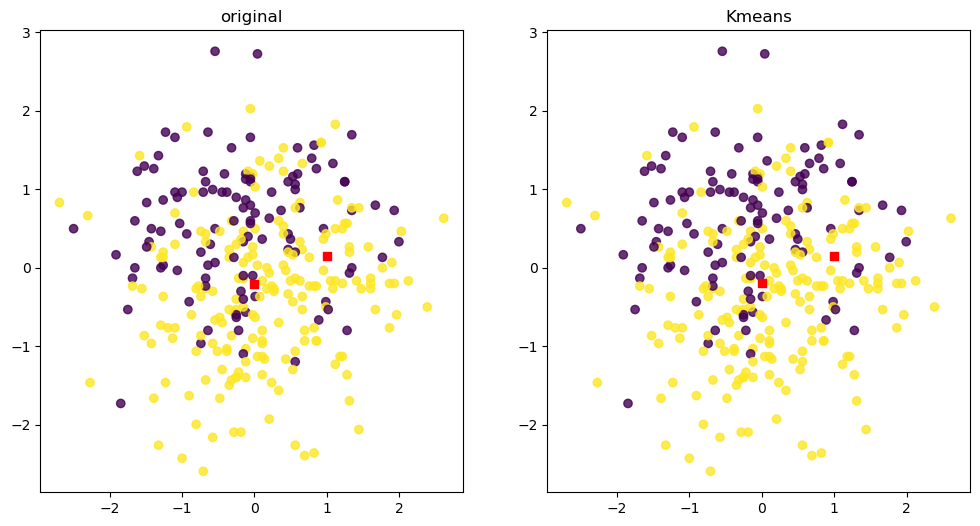

In [567]:
#Visualisation des clusters et centroïdes sur la base de test
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1], c=y_test, alpha=0.8)
ax.scatter(centers.iloc[:,0], centers.iloc[:,1], marker="s", c="red")
ax.set_title("original")

ax = fig.add_subplot(1,2,2)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=labels_pred, alpha=0.8)
ax.scatter(centers_km.iloc[:,0], centers_km.iloc[:,1], marker="s", c="red")
ax.set_title("Kmeans")

plt.show()



<div style="background-color: RGB(32, 178, 170);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6  - KNN (K-plus proches voisins)</h2>
</div>

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">6.1 -  Création du modèle</h3>
</div>

In [569]:
#Création d'un dataframe pour appliquer l'algorithme KNN

KNN_billet = billet_clean.copy()

In [571]:
#Séparation des variables prédictrices et la variables cibles
X = KNN_billet.drop("is_genuine", axis=1)
y = KNN_billet["is_genuine"]


#Séparer les données sur la base Train /Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)


#Standardiser les données
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [573]:
#Visualisation des dimensions des bases
X_train.shape, X_test.shape

((1200, 6), (300, 6))

In [575]:
#Création du modèle sans optimisation
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

#Prédiction
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


In [577]:
#Evaluation du modèle
knn_accuracy_train = round(accuracy_score(y_train,y_train_pred)*100,2)
knn_accuracy_test = round(accuracy_score(y_test,y_test_pred)*100,2)

print("L'accuracy score sur la base train est de :", knn_accuracy_train,"%")
print("L'accuracy score sur la base test est de :", knn_accuracy_test,"%\n")




L'accuracy score sur la base train est de : 99.17 %
L'accuracy score sur la base test est de : 98.67 %



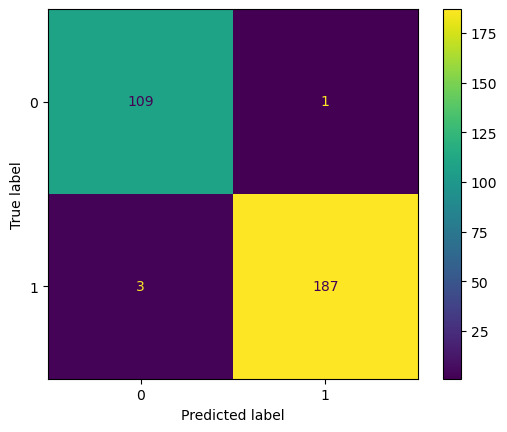

In [579]:
#Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_pred)
display_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

display.plot()
plt.show()
print("\n")


In [581]:
#Rapport de classification
print(classification_report(y_test, y_test_pred, digits=3),)


              precision    recall  f1-score   support

           0      1.000     0.964     0.981       110
           1      0.979     1.000     0.990       190

    accuracy                          0.987       300
   macro avg      0.990     0.982     0.986       300
weighted avg      0.987     0.987     0.987       300



In [583]:
knn_precision_score = round(precision_score(y_test, y_test_pred)*100,3)
knn_recall_score = round(recall_score(y_test, y_test_pred)*100,3)
knn_f1_score = round(f1_score(y_test, y_test_pred)*100,3)


knn_metrics1 = pd.DataFrame(
    {
    "Accuracy_score" :[knn_accuracy_test],
    "Precision_score" :[knn_precision_score],
    "Recall_score" :[knn_recall_score],
    "f1_score" : [knn_f1_score]
    },
    index=["KNN"]
)
    
knn_metrics1

,Accuracy_score,Precision_score,Recall_score,f1_score
KNN,98.67,97.938,100.0,98.958


<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">6.2 -  Optimisation du modèle via GridSearchCV</h3>
</div>

In [586]:
# Définition des paramètres
parameters = {
    "n_neighbors": range(1,31),
    "weights": ["uniform","distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
}

In [588]:
#Création du modèle optimisé à l'aide de la validation croisée

knn= KNeighborsClassifier()

grid_knn = GridSearchCV(knn,parameters,scoring="roc_auc_ovr", cv=5)
grid_knn.fit(X_train, y_train)


print("Les meilleurs paramètres sont :", grid_knn.best_params_,"\n")
print("Le meilleur score est :", grid_knn.best_score_,"\n")
print("Le meilleur modèle est donc :",grid_knn.best_estimator_)

Les meilleurs paramètres sont : {'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'uniform'} 

Le meilleur score est : 0.9992244381133271 

Le meilleur modèle est donc : KNeighborsClassifier(metric='manhattan', n_neighbors=25)


In [590]:
# Enregistrement du modèle

knn= grid_knn.best_estimator_

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">6.3 -  Prédiction et évaluation du modèle</h3>
</div>

In [593]:
#Entraînement du modèle sur la base train 
knn.fit(X_train, y_train)

#prédiction sur la base Train /Test
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


In [595]:
#Evaluation du modèle
knn_train_accuracy = round(accuracy_score(y_train,y_train_pred)*100,3)
knn_test_accuracy = round(accuracy_score(y_test,y_test_pred)*100,3)


print("L'accuracy sur la base train est de  :",knn_train_accuracy )
print("L'accuracy sur la base test est de:",knn_test_accuracy )


L'accuracy sur la base train est de  : 98.917
L'accuracy sur la base test est de: 99.0


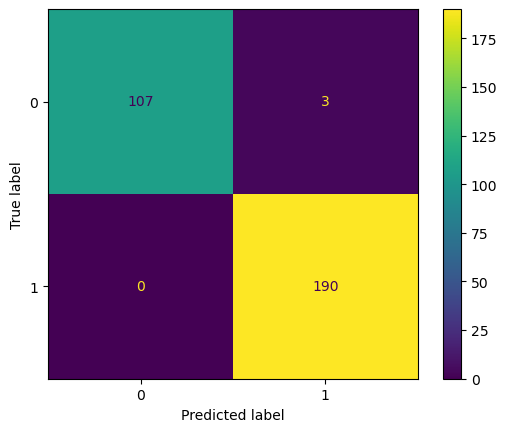

In [597]:
#Matrice de confusion
conf_matrix = confusion_matrix(y_test,y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

display.plot()
plt.show()

In [599]:
#Rapport de classification

print(classification_report(y_test, y_test_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.973     0.986       110
           1      0.984     1.000     0.992       190

    accuracy                          0.990       300
   macro avg      0.992     0.986     0.989       300
weighted avg      0.990     0.990     0.990       300



On constate une nette amélioration suite à l'optimisation du modèle

In [602]:
knn_precision_score = round(precision_score(y_test, y_test_pred)*100,3)
knn_recall_score = round(recall_score(y_test, y_test_pred)*100,3)
knn_f1_score = round(f1_score(y_test, y_test_pred)*100,3)


knn_metrics2 = pd.DataFrame(
    {
    "Accuracy_score" :[knn_accuracy_test],
    "Precision_score" :[knn_precision_score],
    "Recall_score" :[knn_recall_score],
    "f1_score" : [knn_f1_score]
    },
     ["KNN"]
)
    
knn_metrics2

,Accuracy_score,Precision_score,Recall_score,f1_score
KNN,98.67,98.446,100.0,99.217


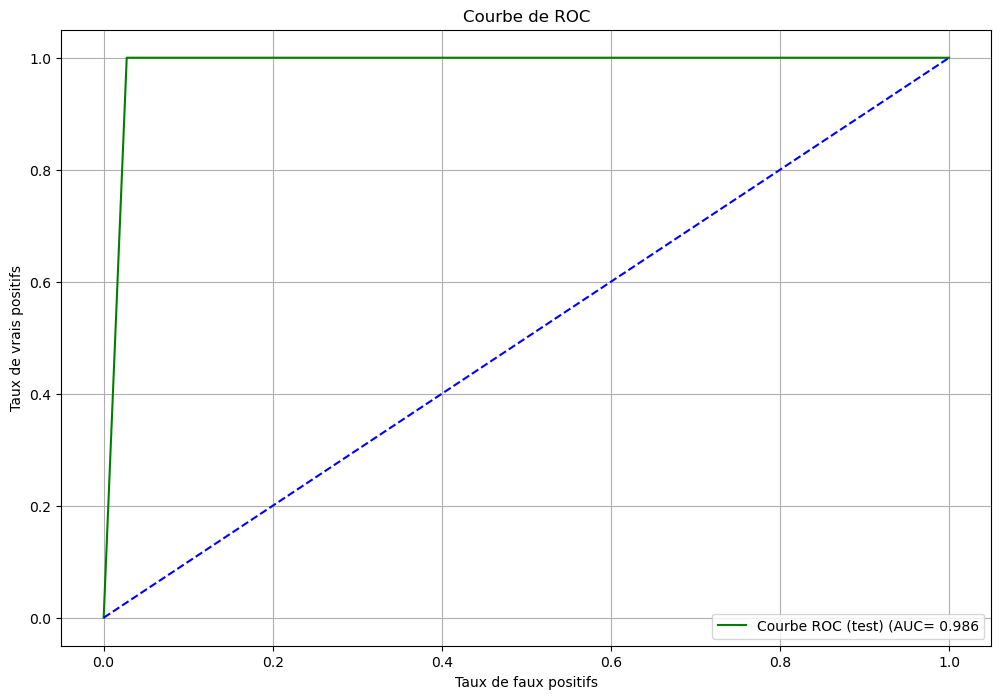

In [604]:
#Visualisation de la courbe de ROC

#Calculs des taux de vrais positifs et faux positifs
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, y_test_pred)

#Calculs des aires sous la courbes
knn_roc_auc_test = auc(knn_test_fpr, knn_test_tpr)

#Tracer les courbes ROC des bases Train / Test
plt.figure(figsize=(12,8))
plt.plot(knn_test_fpr,knn_test_tpr, color= "green", label= "Courbe ROC (test) (AUC= %0.3f"% knn_roc_auc_test)
plt.plot([0,1], [0,1], color="b", linestyle="--")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend()
plt.grid()
plt.title("Courbe de ROC")
plt.show()

    

                                                            

<div style="background-color: RGB(32, 178, 170);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 7 - Random forest</h2>
</div>

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">7.1 -  Création du modèle sans optimisation</h3>
</div>

In [608]:
#Création d'un dataframe pour appliquer l'algorithme Random Forest
rf_billet = billet_clean.copy()

In [610]:
#Séparation des variables prédictrices et de la variable cible
X = rf_billet.drop("is_genuine", axis=1)
y = rf_billet["is_genuine"]

#Scinder les données sur la base Train / Test
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [612]:
#Entraînement du modèle
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">7.2 -  Prédiction et évaluation du modèle non optimisé</h3>
</div>

In [615]:
#Prédiction
y_train_pred = rf.predict(X_train)

y_test_pred = rf.predict(X_test)

In [617]:
#Evaluation du modèle

rf_train_accuracy = round(accuracy_score(y_train, y_train_pred)*100,2)
rf_test_accuracy = round(accuracy_score(y_test, y_test_pred)*100,2)

print("L'accuracy score sur la base train est de :", rf_train_accuracy,"%")
print("L'accuracy score sur la base test est de :", rf_test_accuracy,"%\n")

                          

L'accuracy score sur la base train est de : 100.0 %
L'accuracy score sur la base test est de : 99.33 %



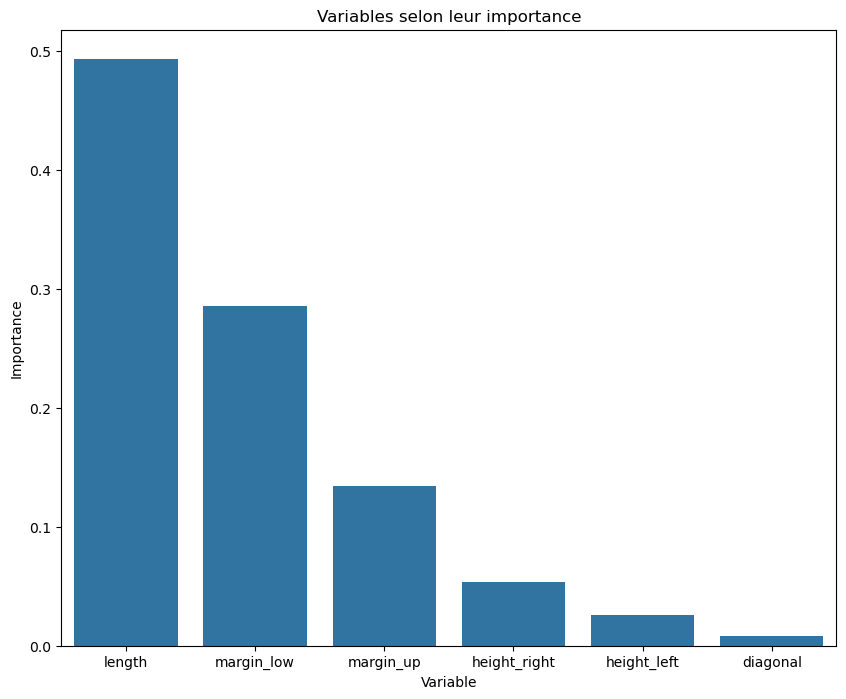

In [619]:
#Visualiser les variables selon leur importance 
var_importance = rf.feature_importances_

df_importance = pd.DataFrame({"Variable": X.columns, "Importance" : var_importance})
df_importance = df_importance.sort_values("Importance", ascending=False)

#Visualisation des variables 
plt.figure(figsize=(10,8))
sns.barplot(data=df_importance, x="Variable", y="Importance")
plt.title("Variables selon leur importance")
plt.show()

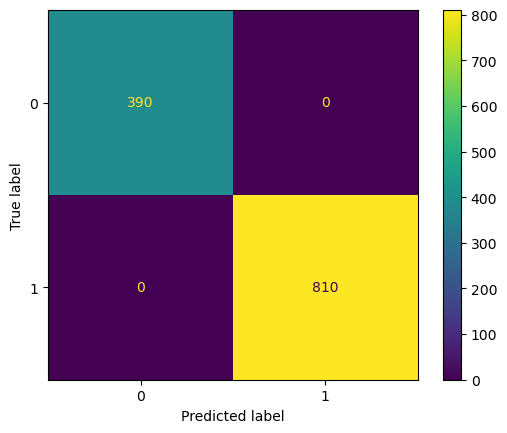

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       390
           1      1.000     1.000     1.000       810

    accuracy                          1.000      1200
   macro avg      1.000     1.000     1.000      1200
weighted avg      1.000     1.000     1.000      1200
 



In [621]:
#Evaluation du modèle sur la base train
conf_matrix = confusion_matrix(y_train,y_train_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

display.plot()
plt.show()

print(classification_report(y_train, y_train_pred, digits=3),"\n")


In [623]:
rf_precision_score = round(precision_score(y_train, y_train_pred)*100,3)
rf_recall_score = round(recall_score(y_train, y_train_pred)*100,3)
rf_f1_score = round(f1_score(y_train, y_train_pred)*100,3)


rf_train_metrics = pd.DataFrame(
    {
    "Accuracy_score" :[rf_train_accuracy],
    "Precision_score" :[rf_precision_score],
    "Recall_score" :[rf_recall_score],
    "f1_score" : [rf_f1_score]
    },
    index=["Random Forest"]
)
    
rf_train_metrics

,Accuracy_score,Precision_score,Recall_score,f1_score
Random Forest,100.0,100.0,100.0,100.0


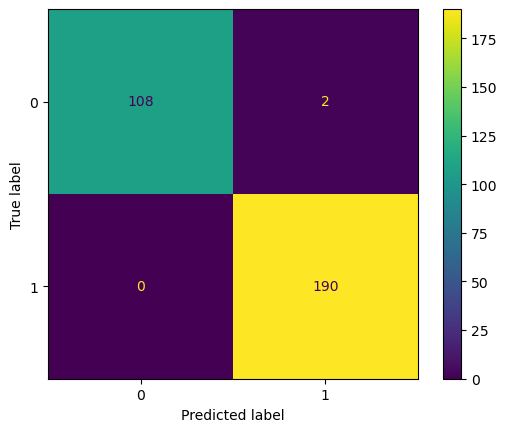



              precision    recall  f1-score   support

           0      1.000     0.982     0.991       110
           1      0.990     1.000     0.995       190

    accuracy                          0.993       300
   macro avg      0.995     0.991     0.993       300
weighted avg      0.993     0.993     0.993       300



In [625]:
#Evaluation du modèle sur la base test
conf_matrix = confusion_matrix(y_test,y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

display.plot()
plt.show()
print("\n")

print(classification_report(y_test, y_test_pred, digits=3))

On constate que le modèle est plus performant sur la base train.
A présent, nous allons essayer d'optimiser le modèle pour réduire l'écart du score de la base train pour une meilleure extrapolation sur la base test

In [628]:
rf_precision_score = round(precision_score(y_test, y_test_pred)*100,3)
rf_recall_score = round(recall_score(y_test, y_test_pred)*100,3)
rf_f1_score = round(f1_score(y_test, y_test_pred)*100,3)


rf_test_metrics = pd.DataFrame(
    {
    "Accuracy_score" :[rf_test_accuracy],
    "Precision_score" :[rf_precision_score],
    "Recall_score" :[rf_recall_score],
    "f1_score" : [rf_f1_score]
    },
    index=["Random Forest"]
)
    
rf_test_metrics

,Accuracy_score,Precision_score,Recall_score,f1_score
Random Forest,99.33,98.958,100.0,99.476


<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">7.3 -  Création du modèle avec optimisation</h3>
</div>

In [631]:
#Définition des paramètres

rf_params = {
    "n_estimators" : range(10,160,10),
    "max_depth" : range(2,10,2),
   
    
}

In [633]:
#Création du modèle avec optimisation

rf= RandomForestClassifier(random_state=10)

grid_rf = GridSearchCV(rf,rf_params,scoring="roc_auc_ovr", cv=5)
grid_rf.fit(X_train, y_train)


print("Les meilleurs paramètres sont :", grid_rf.best_params_,"\n")
print("Le meilleur score est :", grid_rf.best_score_,"\n")
print("Le meilleur modèle est donc :",grid_rf.best_estimator_)



Les meilleurs paramètres sont : {'max_depth': 4, 'n_estimators': 150} 

Le meilleur score est : 0.9995884773662551 

Le meilleur modèle est donc : RandomForestClassifier(max_depth=4, n_estimators=150, random_state=10)


In [635]:
#Enregistrement du modèle dans une variable

random_forest = grid_rf.best_estimator_

<div style="border: 1px solid RGB(32, 178, 170);" >
<h3 style="margin: auto; padding: 20px; color: RGB(32, 178, 170); ">7.4 -  Prédiction et évaluation du modèle optimisé</h3>
</div>

In [638]:
#Entrainement du modèle 
random_forest.fit(X_train,y_train)

# Prédiction sur les base Test et Train
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

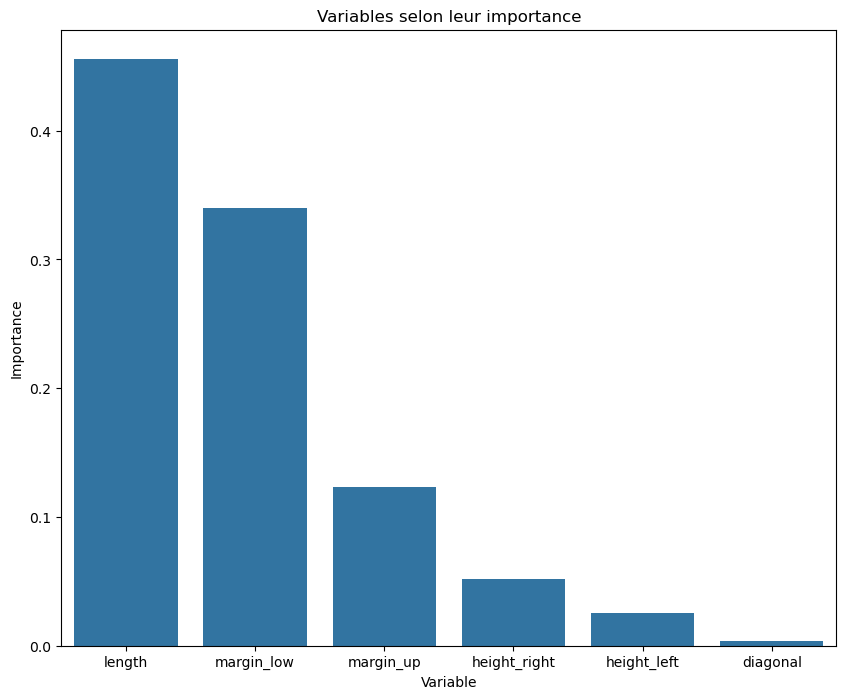

In [640]:
#Visualiser les variables selon leur importance 

var_importance = random_forest.feature_importances_

df_importance = pd.DataFrame({"Variable": X.columns, "Importance" : var_importance})
df_importance = df_importance.sort_values("Importance", ascending=False)

#Visualisation des variables 
plt.figure(figsize=(10,8))
sns.barplot(data=df_importance, x="Variable", y="Importance")
plt.title("Variables selon leur importance")
plt.show()

In [642]:
rf_train_accuracy = round(accuracy_score(y_train,y_train_pred)*100,3)
rf_test_accuracy = round(accuracy_score(y_test,y_test_pred)*100,3)

print("L'accuracy score sur la base train est de :",rf_train_accuracy,"%")
print("L'accuracy score sur la base test est de:",rf_test_accuracy,"%\n")


L'accuracy score sur la base train est de : 99.333 %
L'accuracy score sur la base test est de: 99.0 %



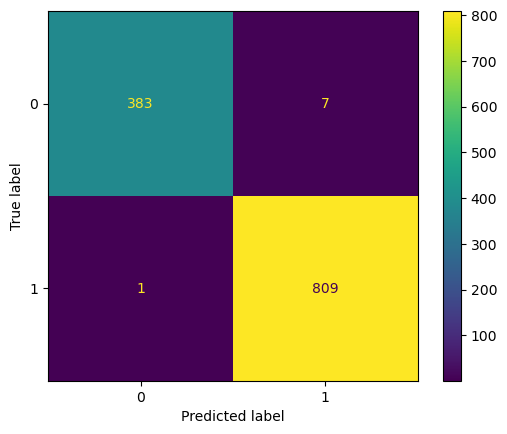



              precision    recall  f1-score   support

           0      0.997     0.982     0.990       390
           1      0.991     0.999     0.995       810

    accuracy                          0.993      1200
   macro avg      0.994     0.990     0.992      1200
weighted avg      0.993     0.993     0.993      1200



In [644]:
#Evaluation du modèle sur la base train
conf_matrix = confusion_matrix(y_train,y_train_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

display.plot()
plt.show()
print("\n")

print(classification_report(y_train, y_train_pred, digits=3))

In [646]:
rf_precision_score = round(precision_score(y_train, y_train_pred)*100,3)
rf_recall_score = round(recall_score(y_train, y_train_pred)*100,3)
rf_f1_score = round(f1_score(y_train, y_train_pred)*100,3)


rf_train_metrics1 = pd.DataFrame(
    {
    "Accuracy_score" :[rf_train_accuracy],
    "Precision_score" :[rf_precision_score],
    "Recall_score" :[rf_recall_score],
    "f1_score" : [rf_f1_score]
    },
    index=["Random Forest"]
)

    
rf_train_metrics1

,Accuracy_score,Precision_score,Recall_score,f1_score
Random Forest,99.333,99.142,99.877,99.508


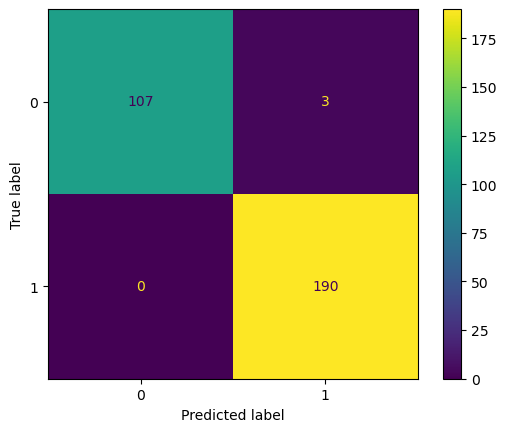



              precision    recall  f1-score   support

           0      1.000     0.973     0.986       110
           1      0.984     1.000     0.992       190

    accuracy                          0.990       300
   macro avg      0.992     0.986     0.989       300
weighted avg      0.990     0.990     0.990       300



In [648]:
#Evaluation du modèle sur la base test
conf_matrix = confusion_matrix(y_test,y_test_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

display.plot()
plt.show()
print("\n")

print(classification_report(y_test, y_test_pred, digits=3))


In [650]:
rf_precision_score = round(precision_score(y_test, y_test_pred)*100,3)
rf_recall_score = round(recall_score(y_test, y_test_pred)*100,3)
rf_f1_score = round(f1_score(y_test, y_test_pred)*100,3)


rf_test_metrics1 = pd.DataFrame(
    {
    "Accuracy_score" :[rf_test_accuracy],
    "Precision_score" :[rf_precision_score],
    "Recall_score" :[rf_recall_score],
    "f1_score" : [rf_f1_score]
    },
    index= ["Random Forest"]
)
    
rf_test_metrics1

,Accuracy_score,Precision_score,Recall_score,f1_score
Random Forest,99.0,98.446,100.0,99.217


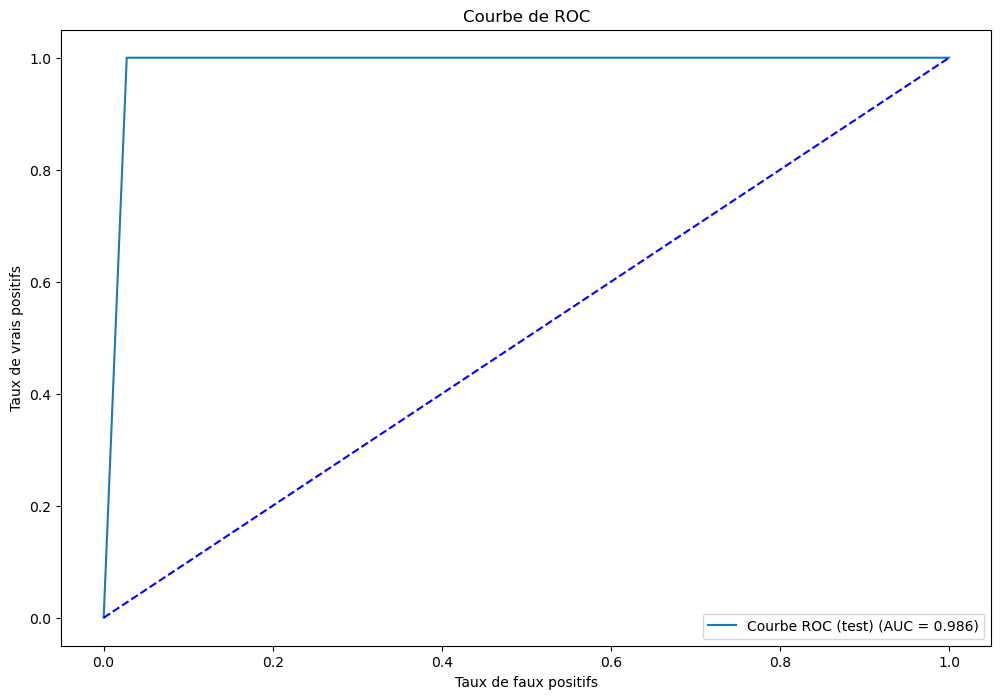

In [652]:
# Visualisation de la courbe de ROC

#calcul des taux de faux positifs et faux négatifs
rf_test_fpr, rf_test_tpr, rf_train_thresholds = roc_curve(y_test, y_test_pred)

#Calculs des aires sous la courbes

rf_roc_auc_test = auc(rf_test_fpr, rf_test_tpr)

#Tracer les courbes ROC pour les base Train / Test
plt.figure(figsize=(12,8))
plt.plot(rf_test_fpr, rf_test_tpr, label="Courbe ROC (test) (AUC = %0.3f)"%rf_roc_auc_test)
plt.plot([0,1],[0,1], ls="--", color="b")
plt.title("Courbe de ROC")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend()
plt.show()

<div style="background-color: RGB(32, 178, 170);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 8  - Récapitulatif des scores de performance pour chaque algorithme</h2>
</div>

In [655]:
# Récapitulatif des performances pour chaque algorithme
list_perf = [rl_metrics, kmeans_metrics, knn_metrics2, rf_test_metrics1]

performance = pd.concat(list_perf)

# appliquer une mise en forme conditionnelle 

fm = sns.light_palette("green", as_cmap=True)
gradient = performance.style.background_gradient(cmap=fm)

gradient

,Accuracy_score,Precision_score,Recall_score,f1_score
Régression logistique,99.000000,98.446000,100.000000,99.217000
Kmeans,98.670000,99.468000,98.421000,98.942000
KNN,98.670000,98.446000,100.000000,99.217000
Random Forest,99.000000,98.446000,100.000000,99.217000


In [657]:
# Sauvergader le model sélectionné
joblib.dump(rl_model,"selected_model")

['selected_model']